In [6]:
import pandas as pd
import os

In [7]:
# Relic - Full
#RESULT_DIR = '/home/suhail/Projects/relic/primitives/python/generator/results/5iters_2/'

# Baseline
RESULT_DIR = '/home/suhail/Projects/relic/primitives/python/generator/dataset/'

In [8]:
notebooks = [d for d in os.listdir(RESULT_DIR) if os.path.isdir(os.path.join(RESULT_DIR, d))]


In [9]:
notebooks

['20200517-200627',
 '20200517-201529',
 '20200517-200612',
 '20200517-200534',
 '20200517-200525',
 '20200517-200544',
 '20200517-200624',
 '20200517-200729',
 '20200517-200706',
 '20200517-200727',
 '20200517-200644',
 '20200517-200536',
 '20200517-200711',
 '20200517-200545',
 '20200517-200611',
 '20200517-200549',
 '20200517-201531',
 '20200517-200623',
 '20200517-200617',
 '20200517-201542',
 '20200517-200732',
 '20200517-200533',
 '20200517-200707',
 '20200517-200523',
 '20200517-200641',
 '20200517-200639',
 '20200517-200522']

In [10]:
from collections import Counter

def get_notebook_result(result_dir, nb, filename='relic_agglomerative_result.csv'):
    return pd.read_csv(result_dir+'/'+nb+'/'+filename, index_col=0)

errors = []
int_columns = ['artifacts', 'columns', 'rows']

def experiment1_results():
    result = pd.DataFrame()
    fcounter = Counter()
    for nb in notebooks:
        try:
            nb_result = get_notebook_result(RESULT_DIR,nb).iloc[-1]
            baseline_result = get_notebook_result(RESULT_DIR,nb,filename='baseline_union_result.csv').iloc[-1]
            g = graphs.get_graph(RESULT_DIR,nb)
            artifacts = get_notebook_artifact_list(nb)
            diff = set(g.nodes()).symmetric_difference(set(artifacts))
            print(diff)
            nb_result['files'] = len(artifacts)
            nb_result['symdiff'] = len(diff)
            nb_result['gt_comp'] = len([x for x in nx.weakly_connected_components(g)])
            baseline_result['files'] = len(artifacts)
            baseline_result['symdiff'] = len(diff)
            baseline_result['gt_comp'] = len([x for x in nx.weakly_connected_components(g)])
            result = result.append(nb_result)
            result = result.append(baseline_result)
            # find the operations that are worst offenders
            g_truth = graphs.get_graph(RESULT_DIR, nb)
            g_infered = graphs.get_graph_edge_list(RESULT_DIR, nb, 'cell')
            dist = graphs.get_distance_matrix(RESULT_DIR, nb, 'cell')
            exp_graph = graphs.generate_explaination_graph(g_truth, g_infered, dist)
            fcounter += get_wrong_edges(exp_graph)
        except FileNotFoundError as e:
            errors.append(nb)
            #print(e)
            pass
    return result.astype({x:'int64' for x in int_columns})



In [11]:
result = experiment1_results()
result['F1'].mean()

KeyError: 'Only a column name can be used for the key in a dtype mappings argument.'

In [12]:
errors

['20200517-200627',
 '20200517-201529',
 '20200517-200612',
 '20200517-200534',
 '20200517-200525',
 '20200517-200544',
 '20200517-200624',
 '20200517-200729',
 '20200517-200706',
 '20200517-200727',
 '20200517-200644',
 '20200517-200536',
 '20200517-200711',
 '20200517-200545',
 '20200517-200611',
 '20200517-200549',
 '20200517-201531',
 '20200517-200623',
 '20200517-200617',
 '20200517-201542',
 '20200517-200732',
 '20200517-200533',
 '20200517-200707',
 '20200517-200523',
 '20200517-200641',
 '20200517-200639',
 '20200517-200522']

In [109]:
result

,F1,Unnamed: 0,artifacts,columns,distance_metric,edges_correct,edges_missing,edges_to_remove,index,join_edges,missing_files,nb_name,numclusters,pre_cluster,precision,recall,rows,time
0,0.918367,0.0,50,20,cell,45.0,4.0,4.0,0.0,NaN,0.0,20200210-125012,14.0,No Precluster,0.918367,0.918367,10000,78.197633
0,0.840909,0.0,50,20,col,37.0,12.0,2.0,0.0,NaN,0.0,20200210-125012,14.0,No Precluster,0.755102,0.948718,10000,0.913628
13,0.897959,13.0,50,20,pc2cellcol,44.0,5.0,5.0,0.0,NaN,0.0,20200210-125012,14.0,PC2,0.897959,0.897959,10000,2.605460
13,0.938776,13.0,50,20,pc2colcell,46.0,3.0,3.0,0.0,NaN,0.0,20200210-125012,14.0,PC2,0.938776,0.938776,10000,2.363969
0,0.918367,0.0,50,20,cell,45.0,4.0,4.0,0.0,NaN,0.0,20200210-125011,16.0,No Precluster,0.918367,0.918367,1000,33.126057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,0.754098,20.0,100,20,pc2colcell,69.0,30.0,15.0,0.0,NaN,0.0,20200210-125435,35.0,PC2,0.696970,0.821429,10000,9.853822
0,0.836735,0.0,50,10,cell,41.0,8.0,8.0,0.0,NaN,0.0,20200210-124928,9.0,No Precluster,0.836735,0.836735,1000,18.872969
0,0.782609,0.0,50,10,col,36.0,13.0,7.0,0.0,NaN,0.0,20200210-124928,9.0,No Precluster,0.734694,0.837209,1000,0.166685
8,0.795918,8.0,50,10,pc2cellcol,39.0,10.0,10.0,0.0,NaN,0.0,20200210-124928,9.0,PC2,0.795918,0.795918,1000,1.295930


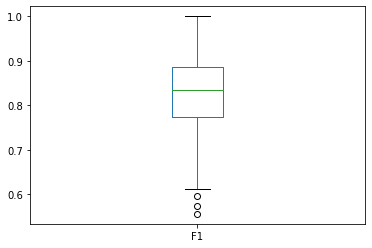

In [110]:
result['F1'].plot.box()

In [111]:
result = result
result = result.set_index(['artifacts','rows','columns']).sort_index()

In [112]:
result

F1  Unnamed: 0 distance_metric  edges_correct  \
artifacts rows  columns                                                        
20        100   10       0.894737         0.0            cell           17.0   
                10       0.800000         0.0             col           14.0   
                10       0.894737         7.0      pc2cellcol           17.0   
                10       0.894737         7.0      pc2colcell           17.0   
                10       0.894737         0.0            cell           17.0   
...                           ...         ...             ...            ...   
100       10000 50       0.892308        20.0      pc2colcell           87.0   
                50       0.903553         0.0            cell           89.0   
                50       0.822222         0.0             col           74.0   
                50       0.878307        20.0      pc2cellcol           83.0   
                50       0.878307        20.0      pc2colcell           83.0   

                         edges_missing  edges_to_remove  index  join_edges  \
artifacts rows  columns                                                      
20        100   10                 2.0              2.0    0.0         NaN   
                10                 5.0              2.0    0.0         NaN   
                10                 2.0              2.0    0.0         NaN   
                10                 2.0              2.0    0.0         NaN   
                10                 2.0              2.0    0.0         NaN   
...                                ...              ...    ...         ...   
100       10000 50                12.0              9.0    0.0         NaN   
                50                10.0              9.0    0.0         NaN   
                50                25.0              7.0    0.0         NaN   
                50                16.0              7.0    0.0         NaN   
                50                16.0              7.0    0.0         NaN   

                         missing_files          nb_name  numclusters  \
artifacts rows  columns                                                
20        100   10                 0.0  20200210-165520          8.0   
                10                 0.0  20200210-165520          8.0   
                10                 0.0  20200210-165520          8.0   
                10                 0.0  20200210-165520          8.0   
                10                 0.0  20200210-124558          9.0   
...                                ...              ...          ...   
100       10000 50                 0.0  20200210-125509         23.0   
                50                 0.0  20200210-125655         29.0   
                50                 0.0  20200210-125655         29.0   
                50                 0.0  20200210-125655         29.0   
                50                 0.0  20200210-125655         29.0   

                           pre_cluster  precision    recall        time  
artifacts rows  columns                                                  
20        100   10       No Precluster   0.894737  0.894737    2.349026  
                10       No Precluster   0.736842  0.875000    0.044628  
                10                 PC2   0.894737  0.894737    0.208828  
                10                 PC2   0.894737  0.894737    0.212304  
                10       No Precluster   0.894737  0.894737    2.389074  
...                                ...        ...       ...         ...  
100       10000 50                 PC2   0.878788  0.906250   10.161642  
                50       No Precluster   0.898990  0.908163  513.275758  
                50       No Precluster   0.747475  0.913580    2.184295  
                50                 PC2   0.838384  0.922222   10.127063  
                50                 PC2   0.838384  0.922222    9.783364  

[540 rows x 15 columns]

In [13]:
np.repeat(np.array([1,2,3,4,5]),2)

NameError: name 'np' is not defined

In [87]:
import numpy as np
s = pd.Series(np.tile(np.repeat(np.array([1,2,3,4,5]),2), 27), index=result.index)

result['iter'] = s

In [91]:
result

,F1,Unnamed: 0,artifacts,columns,distance_metric,edges_correct,edges_missing,edges_to_remove,index,join_edges,missing_files,nb_name,numclusters,pre_cluster,precision,recall,rows,time,method,iter
13,0.938776,13.0,50,20,pandas_cell,46.0,3.0,3.0,0.0,NaN,0.0,20200210-125012,14.0,PC2,0.938776,0.938776,10000,60.993959,relic,1
0,0.918367,0.0,50,20,pandas_col,45.0,4.0,4.0,0.0,NaN,0.0,20200210-125012,14.0,No Preclustering,0.918367,0.918367,10000,30.633578,baseline,1
15,0.877551,15.0,50,20,pandas_cell,43.0,6.0,6.0,0.0,NaN,0.0,20200210-125011,16.0,PC2,0.877551,0.877551,1000,33.922211,relic,2
0,0.918367,0.0,50,20,pandas_col,45.0,4.0,4.0,0.0,NaN,0.0,20200210-125011,16.0,No Preclustering,0.918367,0.918367,1000,8.903980,baseline,2
4,0.789474,4.0,20,20,pandas_cell,15.0,4.0,4.0,0.0,NaN,0.0,20200210-124653,5.0,PC2,0.789474,0.789474,10000,18.238051,relic,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.828283,0.0,100,10,pandas_col,82.0,17.0,17.0,0.0,NaN,0.0,20200210-125337,16.0,No Preclustering,0.828283,0.828283,10000,36.940205,baseline,3
20,0.743169,20.0,100,20,pandas_cell,68.0,31.0,16.0,0.0,NaN,0.0,20200210-125435,35.0,PC2,0.686869,0.809524,10000,171.418868,relic,4
0,0.808081,0.0,100,20,pandas_col,80.0,19.0,19.0,0.0,NaN,0.0,20200210-125435,35.0,No Preclustering,0.808081,0.808081,10000,64.161545,baseline,4
15,0.816327,15.0,50,10,pandas_cell,40.0,9.0,9.0,0.0,NaN,0.0,20200210-124928,9.0,PC2,0.816327,0.816327,1000,21.669972,relic,5


(0, 1.0)

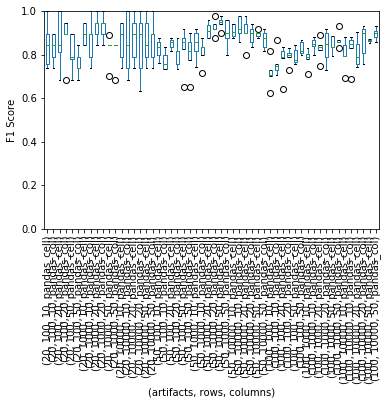

In [86]:
import matplotlib.pyplot as plt
out = pd.concat({key: group['F1'].reset_index(drop=True)
                for key, group in result.groupby(['artifacts', 'rows', 'columns', 'distance_metric'])}, axis=1)
out.plot.box()
plt.xticks(rotation=90)
plt.xlabel('(artifacts, rows, columns)')
plt.ylabel('F1 Score')
plt.ylim((0,1.0))


In [89]:
result['method'] = result['distance_metric'].apply(lambda x: 'relic' if x=='pandas_cell' else 'baseline')

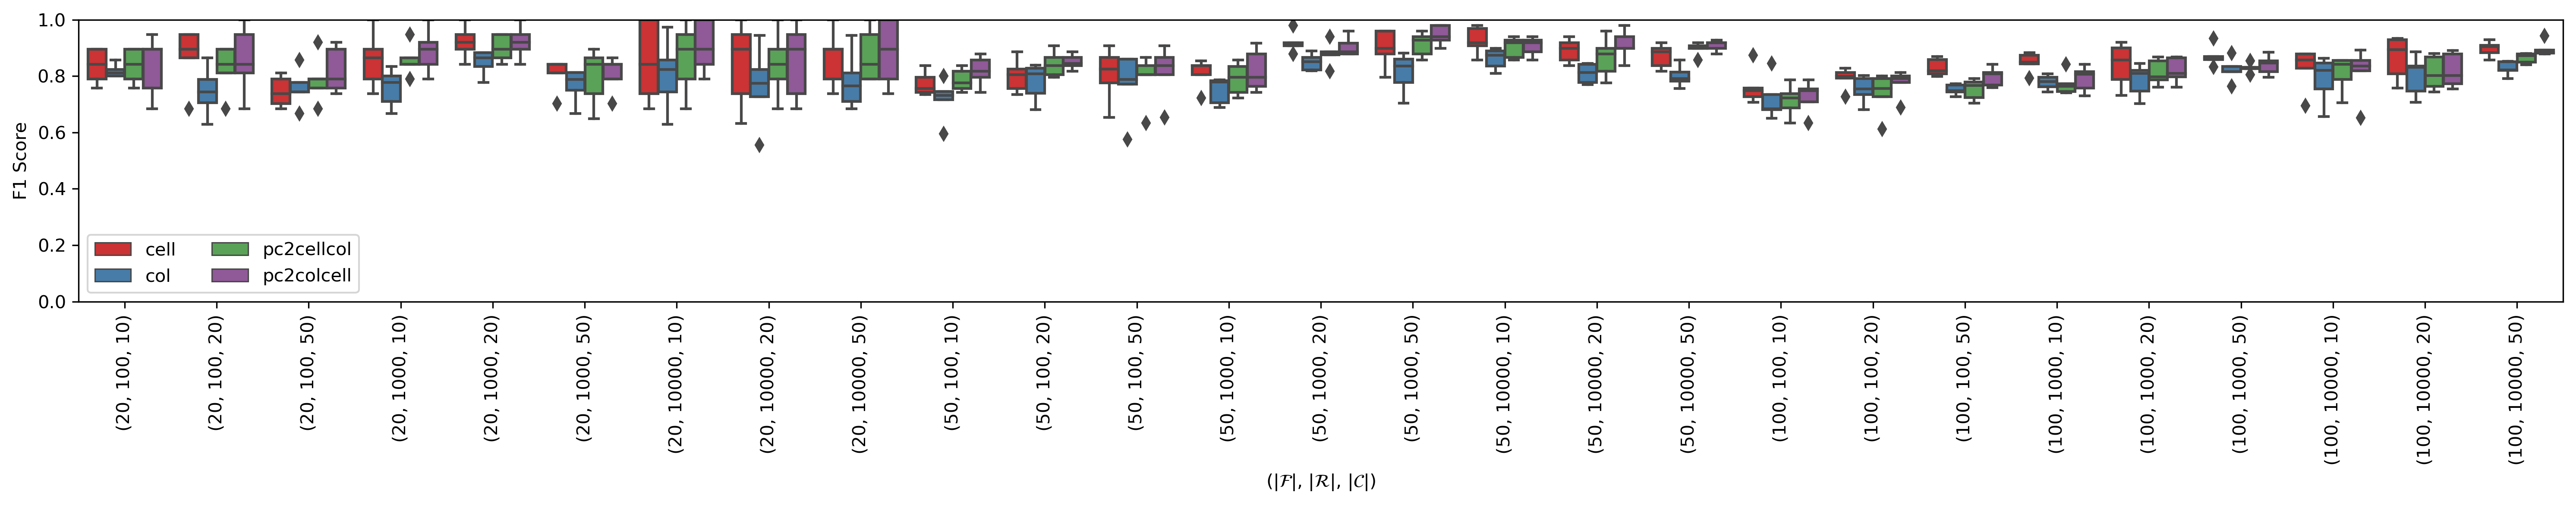

In [115]:
# library and dataset
import seaborn as sns
import matplotlib.pyplot as plt


fig = plt.figure(num=None, figsize=(20, 4), dpi=300, facecolor='w', edgecolor='k')
 
# Grouped boxplot
chart = sns.boxplot(x=result.index, y="F1", hue="distance_metric", data=result, palette="Set1")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.legend(loc='best',ncol=2)
plt.xlabel(r'($|\mathcal{F}|$, $|\mathcal{R}|$, $|\mathcal{C}|$)')
plt.ylabel('F1 Score')
plt.ylim(0,1.0)
plt.tight_layout()


plt.savefig('mb0_baseline_col_union.pdf')


#sns.plt.show()


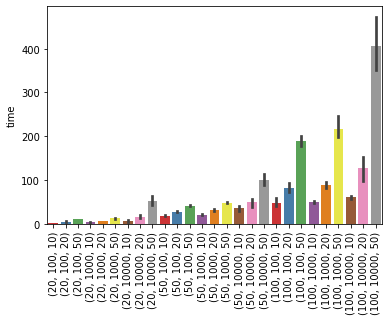

In [36]:
timings = result.loc[result.method == 'relic']
chart2 = sns.barplot(x=timings.index, y="time", data=timings, palette="Set1")
labels = chart2.set_xticklabels(chart.get_xticklabels(), rotation=90)



In [35]:
timings

,,,F1,Unnamed: 0,distance_metric,edges_correct,edges_missing,edges_to_remove,index,join_edges,missing_files,nb_name,numclusters,pre_cluster,precision,recall,time,iter,method
artifacts,rows,columns,,,,,,,,,,,,,,,,,


In [ ]:
out

Text(0, 0.5, 'Runtime (sec)')

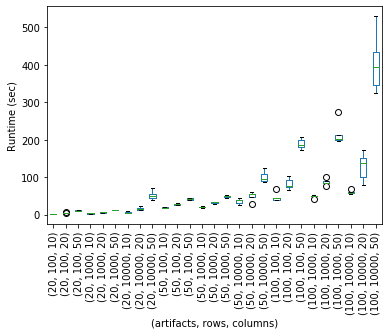

In [231]:
out = pd.concat({key: group['time'].reset_index(drop=True)
                for key, group in result.groupby(result.index)}, axis=1)
out.plot.box()
plt.xticks(rotation=90)
plt.xlabel('(artifacts, rows, columns)')
plt.ylabel('Runtime (sec)')

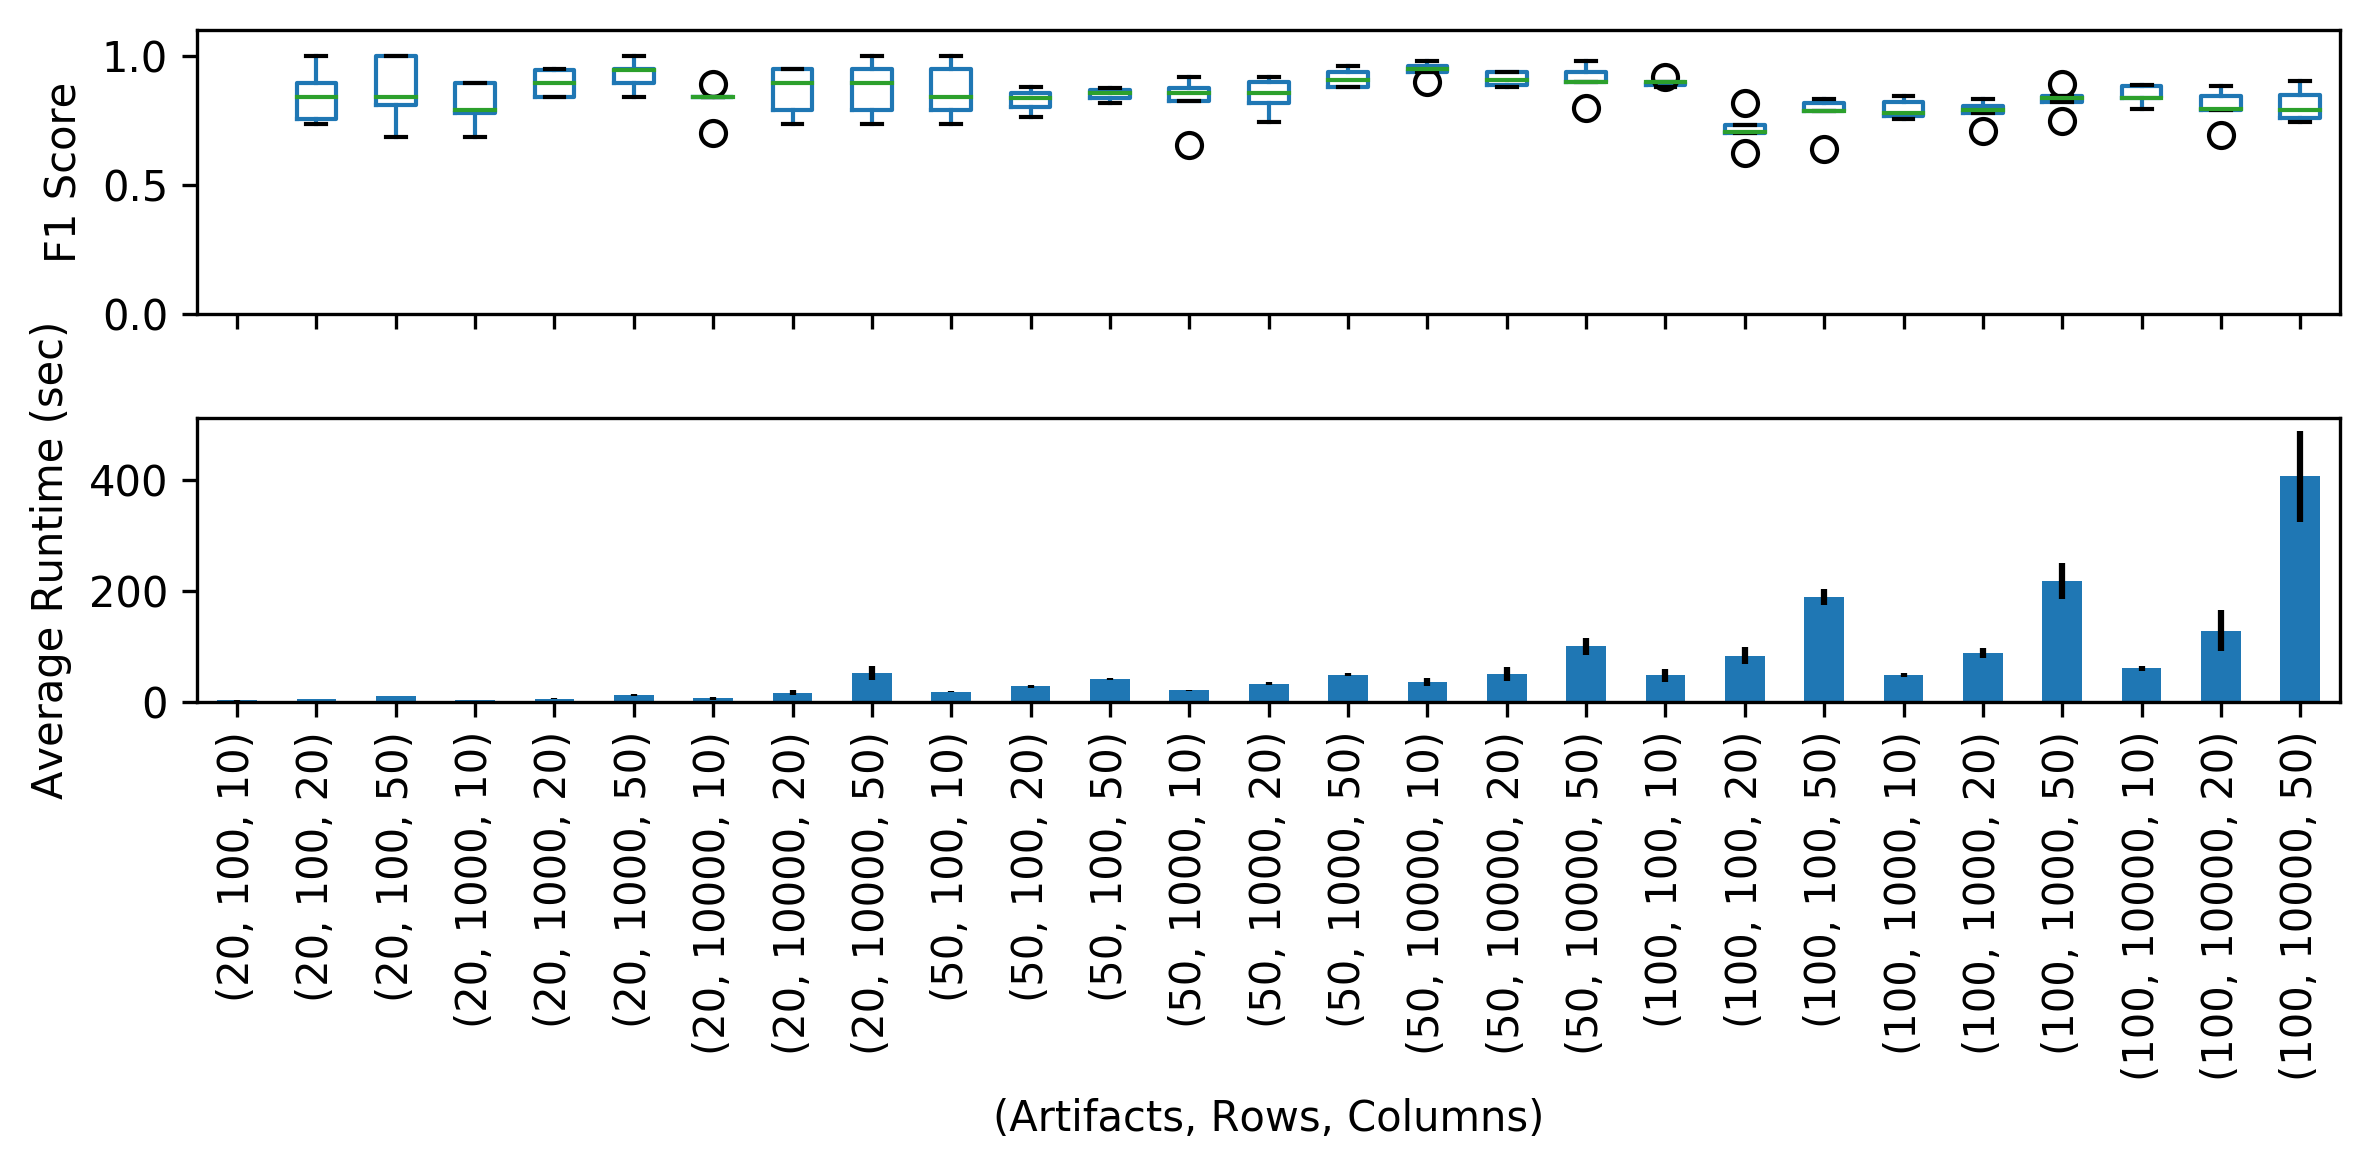

In [392]:
import numpy as np
from matplotlib import gridspec

# Simple data to display in various forms
#x = np.linspace(0, 2 * np.pi, 400)
#y = np.sin(x ** 2)

fig = plt.figure(num=None, figsize=(8, 4), dpi=300, facecolor='w', edgecolor='k')
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 

# the fisrt subplot
ax0 = plt.subplot(gs[0])
# log scale for axis Y of the first subplot
#line0, = ax0.plot(x, y, color='r')
ax0.set_ylabel('F1 Score')
ax0.set_ylim((0,1.1))
out = pd.concat({key: group['F1'].reset_index(drop=True)
                for key, group in result.groupby(result.index)}, axis=1)
out.plot.box(ax=ax0)




#the second subplot
# shared axis X
ax1 = plt.subplot(gs[1], sharex = ax0)

out = result.groupby(result.index).mean()['time']
errors = result.groupby(result.index).std()['time']
out.plot.bar(ax=ax1, yerr=errors)
ax1.set_ylabel('Average Runtime (sec)')


plt.setp(ax0.get_xticklabels(), visible=False)
# remove last tick label for the second subplot
yticks = ax1.yaxis.get_major_ticks()
yticks[-1].label1.set_visible(False)



# remove vertical gap between subplots
#plt.subplots_adjust(hspace=.0)

for i, ax in enumerate(fig.axes):
    matplotlib.pyplot.sca(ax)
    plt.xticks(rotation=90)
    plt.xlabel('(Artifacts, Rows, Columns)')

plt.tight_layout()
plt.savefig('mb1_baseline.pdf')
plt.show()


In [391]:
out

(20, 100, 10)         2.190131
(20, 100, 20)         4.915700
(20, 100, 50)        10.595287
(20, 1000, 10)        2.769071
(20, 1000, 20)        5.509961
(20, 1000, 50)       12.058738
(20, 10000, 10)       6.100198
(20, 10000, 20)      15.854478
(20, 10000, 50)      51.824300
(50, 100, 10)        18.330857
(50, 100, 20)        27.447208
(50, 100, 50)        41.154213
(50, 1000, 10)       20.243705
(50, 1000, 20)       32.194428
(50, 1000, 50)       48.163059
(50, 10000, 10)      35.263252
(50, 10000, 20)      49.199253
(50, 10000, 50)     100.296499
(100, 100, 10)       47.313004
(100, 100, 20)       82.575013
(100, 100, 50)      188.867334
(100, 1000, 10)      48.944211
(100, 1000, 20)      87.646707
(100, 1000, 50)     217.105540
(100, 10000, 10)     59.985507
(100, 10000, 20)    127.928088
(100, 10000, 50)    406.093170
Name: time, dtype: float64

In [218]:
out

20                                                                 \
      100                            1000                           10000   
         10        20         50        10        20         50        10   
0  2.569190  5.734194  10.003802  2.490849  5.183829  11.616878  6.646020   
1  1.982271  4.969955  11.008816  2.623608  5.700888  12.833275  5.240710   
2  2.007464  3.956382  10.906237  2.931382  5.581490  13.325619  4.279318   
3  2.232350  4.917856  10.441410  2.891908  5.651584  11.708199  9.905621   
4  2.159379  5.000113  10.616170  2.907610  5.432013  10.809718  4.429319   

                               50   ...                    100              \
                             100    ...       10000      100                 
          20         50         10  ...          50         10          20   
0  18.238051  49.661333  18.692060  ...  107.506270  39.340742   77.209220   
1  12.006086  44.132703  19.163019  ...  123.787684  44.853644   91.519681   
2  11.958341  70.493380  16.894416  ...   93.760653  68.541522  104.016379   
3  14.414482  56.145768  17.604862  ...   86.823329  38.466569   65.724213   
4  22.655429  38.688315  19.299930  ...   89.604559  45.362544   74.405572   

                                                                         \
                   1000                               10000               
           50         10          20          50         10          20   
0  187.011598  52.178360   84.959112  203.013721  56.081321   79.560194   
1  206.781565  49.830733  101.054054  195.318973  57.283927  101.629832   
2  198.447404  50.701164   76.424669  274.553750  59.724142  136.618561   
3  180.200557  42.706430   85.366291  212.366091  68.259955  150.412986   
4  171.895545  49.304367   90.429408  200.275164  58.578191  171.418868   

               
               
           50  
0  530.385614  
1  345.751204  
2  394.537761  
3  434.936038  
4  324.855231  

[5 rows x 27 columns]

In [213]:
errors

['20200210-125502']

In [130]:
result.index

MultiIndex([( 20.0,   100.0, 10.0),
            ( 20.0,   100.0, 10.0),
            ( 20.0,   100.0, 10.0),
            ( 20.0,   100.0, 10.0),
            ( 20.0,   100.0, 10.0),
            ( 20.0,   100.0, 20.0),
            ( 20.0,   100.0, 20.0),
            ( 20.0,   100.0, 20.0),
            ( 20.0,   100.0, 20.0),
            ( 20.0,   100.0, 20.0),
            ...
            (100.0, 10000.0, 20.0),
            (100.0, 10000.0, 20.0),
            (100.0, 10000.0, 20.0),
            (100.0, 10000.0, 20.0),
            (100.0, 10000.0, 20.0),
            (100.0, 10000.0, 50.0),
            (100.0, 10000.0, 50.0),
            (100.0, 10000.0, 50.0),
            (100.0, 10000.0, 50.0),
            (100.0, 10000.0, 50.0)],
           names=['artifacts', 'rows', 'columns'], length=135)

In [132]:
counts = result.groupby(result.index).count()
counts[counts.F1 > 5]
#counts

,F1,Unnamed: 0,distance_metric,edges_correct,edges_missing,edges_to_remove,index,join_edges,missing_files,nb_name,numclusters,pre_cluster,precision,recall,time


In [119]:
result.loc[(100,100,50)]

F1  Unnamed: 0 distance_metric  edges_correct  \
artifacts rows  columns                                                        
100.0     100.0 50.0     0.806452        20.0     pandas_cell           75.0   
                50.0     0.821053        20.0     pandas_cell           78.0   
                50.0     0.843750        20.0     pandas_cell           81.0   
                50.0     0.766667        20.0     pandas_cell           69.0   
                50.0     0.756757        20.0     pandas_cell           70.0   
                50.0     0.776596        20.0     pandas_cell           73.0   

                         edges_missing  edges_to_remove  index  join_edges  \
artifacts rows  columns                                                      
100.0     100.0 50.0              24.0             12.0    0.0         NaN   
                50.0              21.0             13.0    0.0         NaN   
                50.0              18.0             12.0    0.0         NaN   
                50.0              30.0             12.0    0.0         NaN   
                50.0              29.0             16.0    0.0         NaN   
                50.0              26.0             16.0    0.0         NaN   

                         missing_files          nb_name  numclusters  \
artifacts rows  columns                                                
100.0     100.0 50.0               0.0  20200210-165531         31.0   
                50.0               0.0  20200210-125448         29.0   
                50.0               0.0  20200210-125452         27.0   
                50.0               0.0  20200210-125451         37.0   
                50.0               0.0  20200210-125449         34.0   
                50.0               0.0  20200210-125450         31.0   

                        pre_cluster  precision    recall        time  
artifacts rows  columns                                               
100.0     100.0 50.0            PC2   0.757576  0.862069  211.831584  
                50.0            PC2   0.787879  0.857143  187.011598  
                50.0            PC2   0.818182  0.870968  206.781565  
                50.0            PC2   0.696970  0.851852  198.447404  
                50.0            PC2   0.707071  0.813953  180.200557  
                50.0            PC2   0.737374  0.820225  171.895545

In [11]:
result.to_excel('exp1_PC2_avg_results.xlsx')

In [12]:
# PR Curve for One Notebook as Algorithm Runs


In [293]:

def experiment2_pr_results():
    result = []
    for nb in notebooks:
        result.append(get_notebook_result(RESULT_DIR,nb))
    return result


In [430]:
def plot_pr(r, ax):
    ax = r.plot.line('recall', 'precision', marker="o",legend=False, ax=ax)
    table = r.iloc[0]
    tbl_size = "("+str(table['artifacts'])+", "+str(table['rows'])+", "+str(table['columns'])+" )"
    plt.title(tbl_size)
    plt.ylim(0, 1.0)
    plt.xlim(0,1.0)
    ax.set_ylabel('precision')
    return ax
    

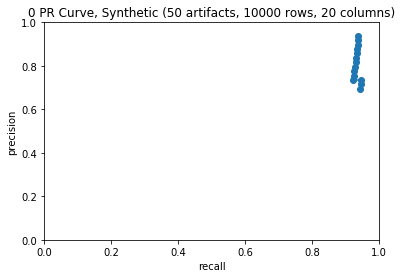

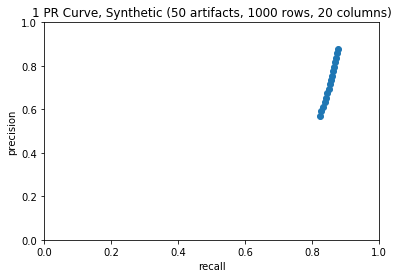

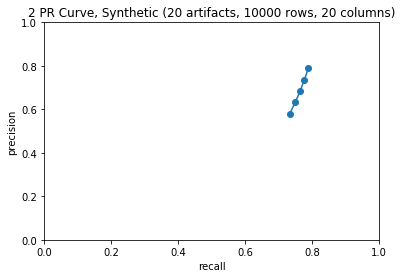

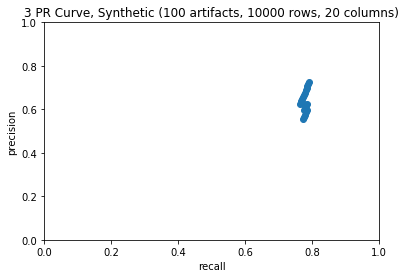

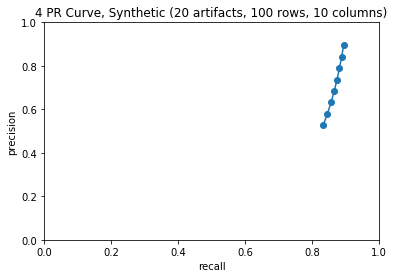

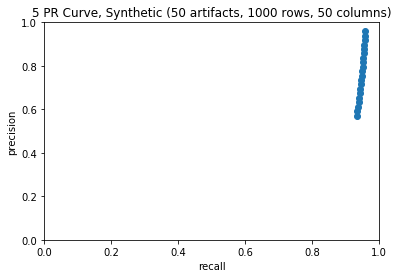

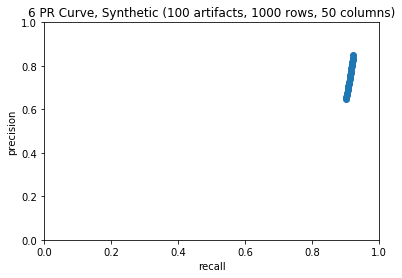

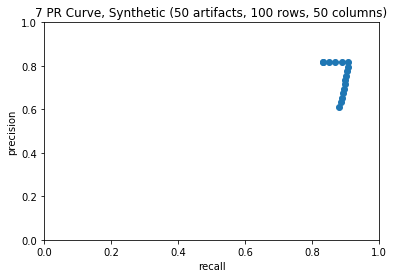

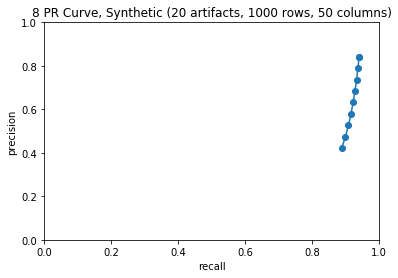

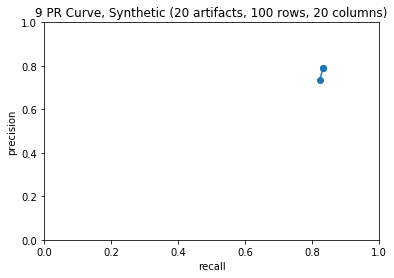

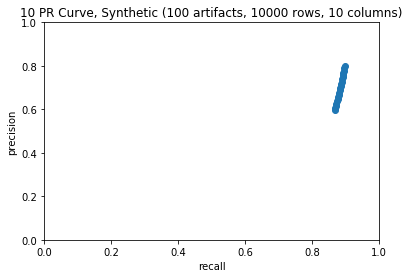

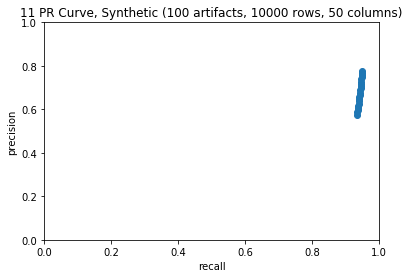

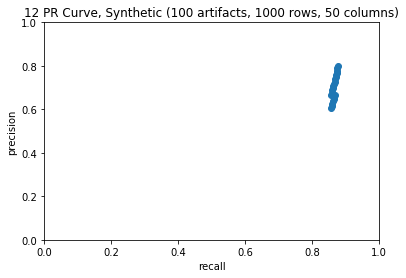

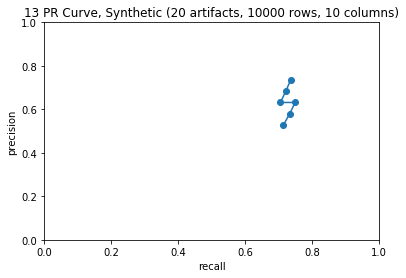

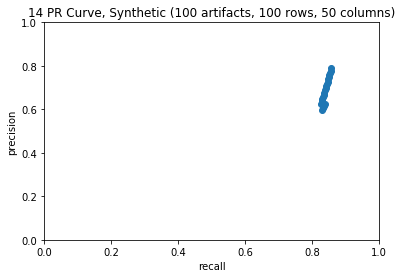

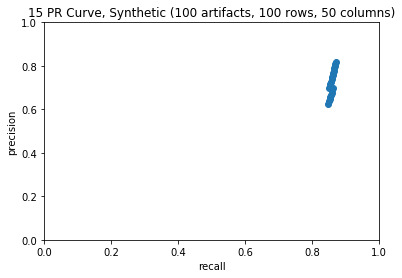

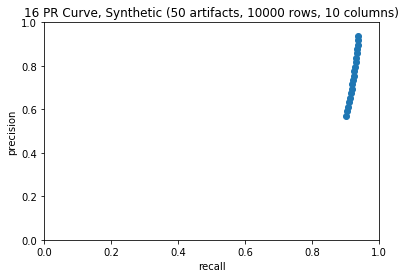

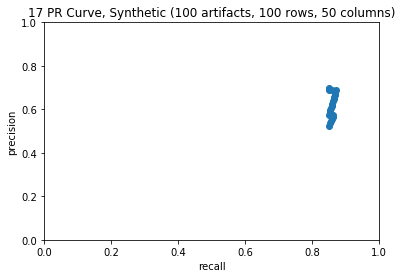

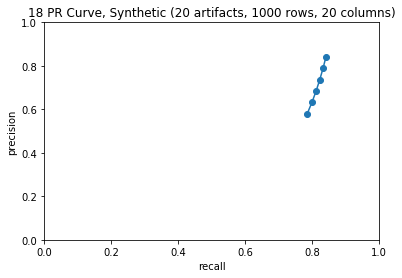

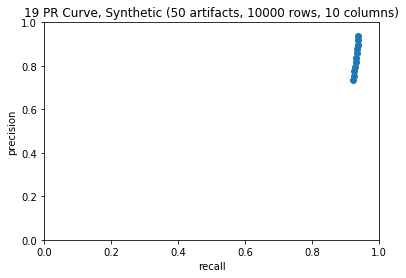

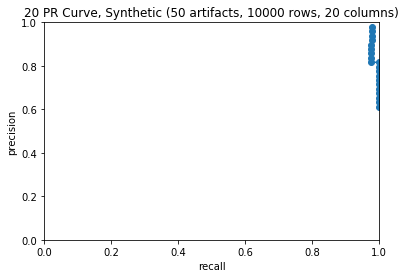

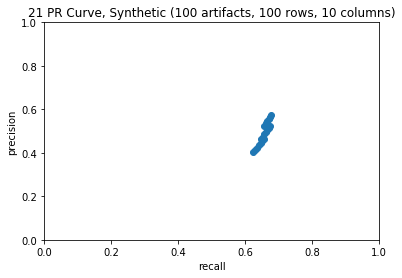

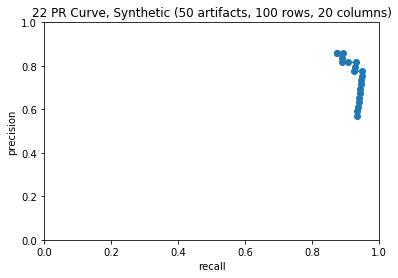

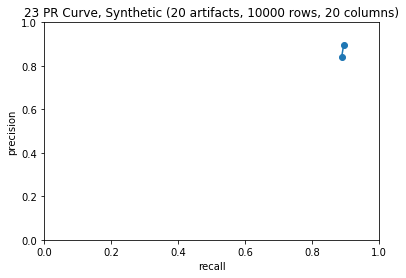

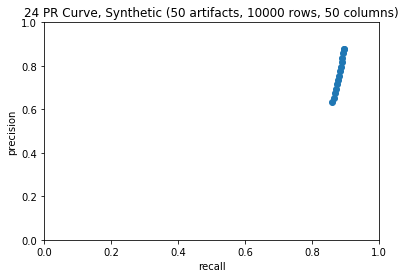

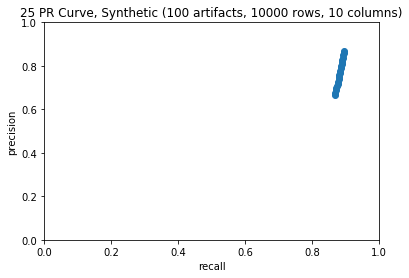

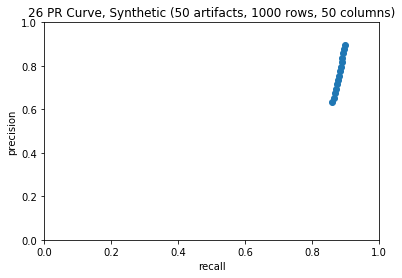

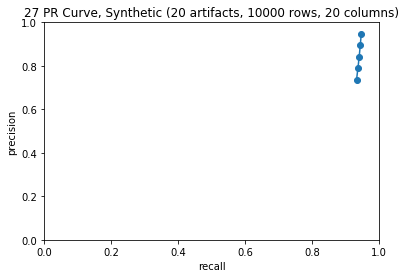

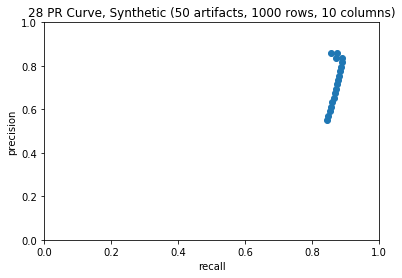

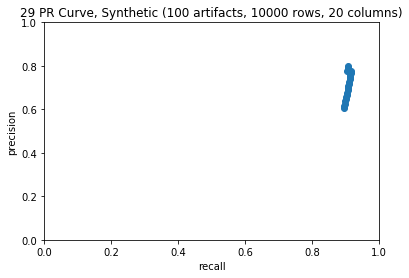

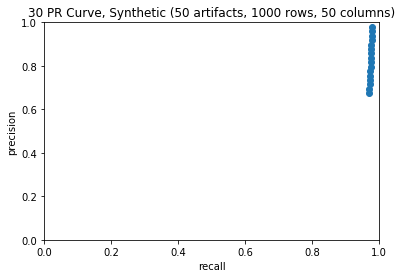

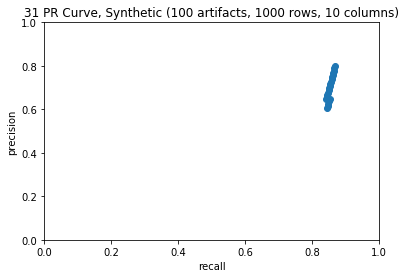

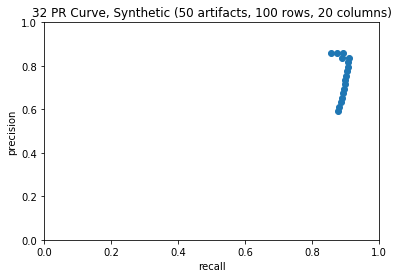

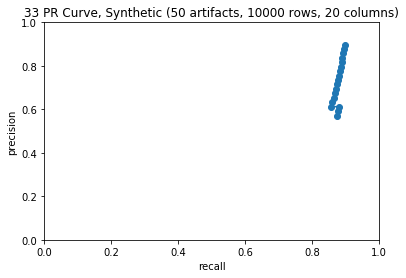

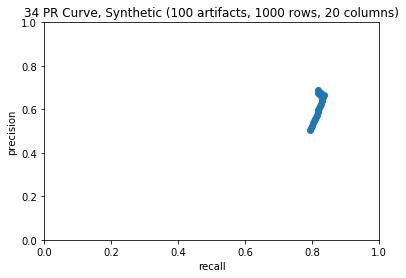

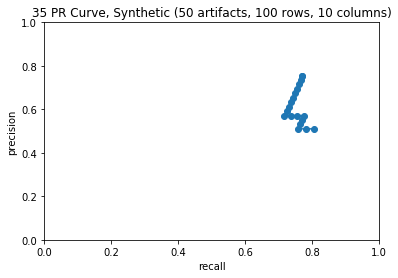

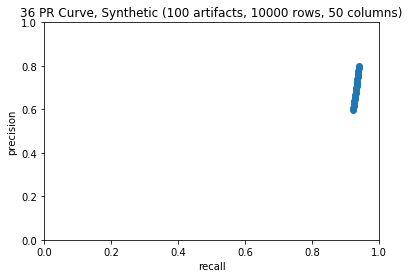

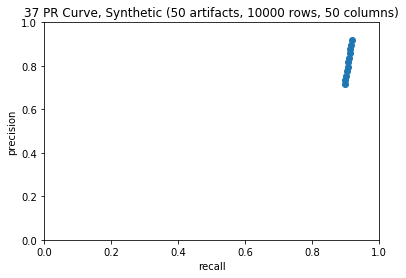

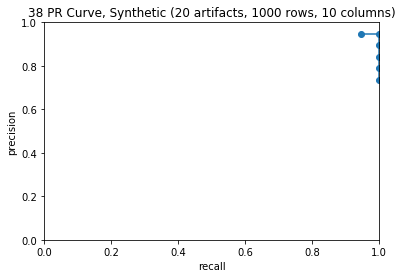

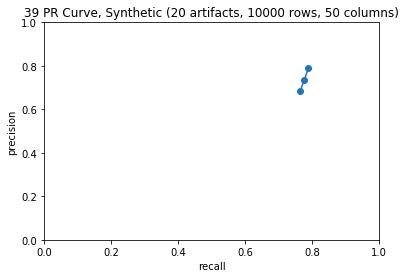

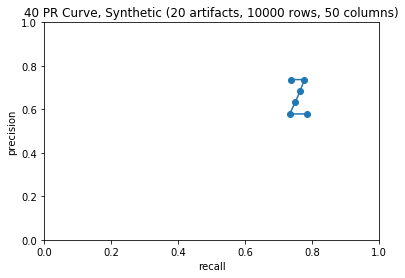

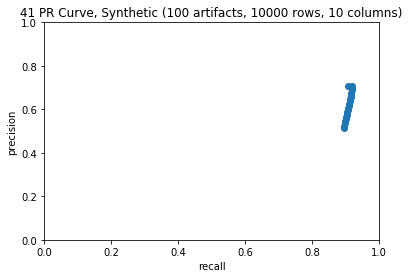

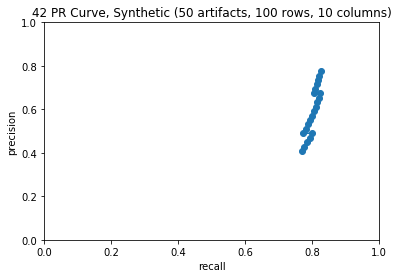

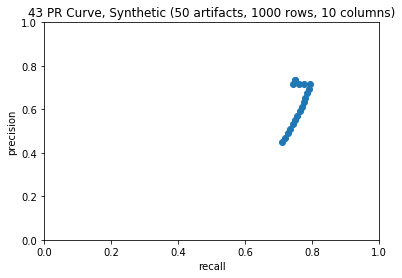

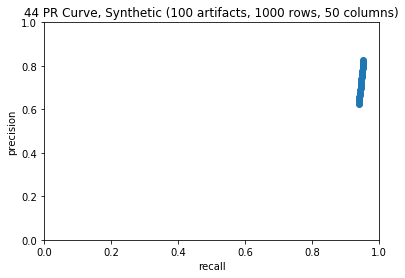

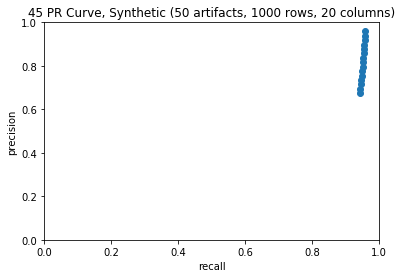

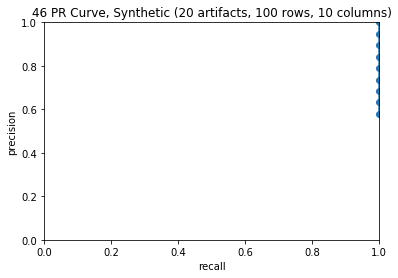

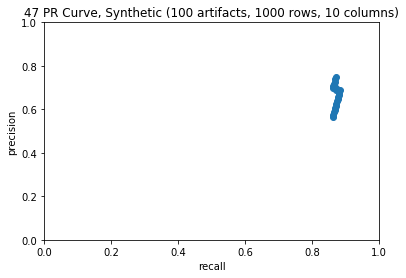

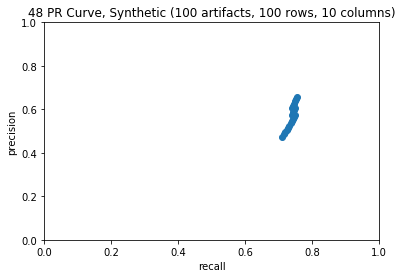

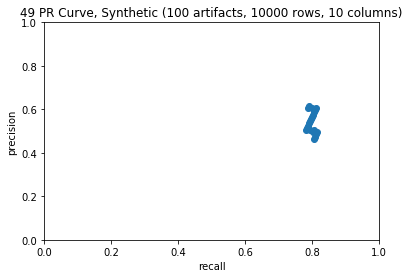

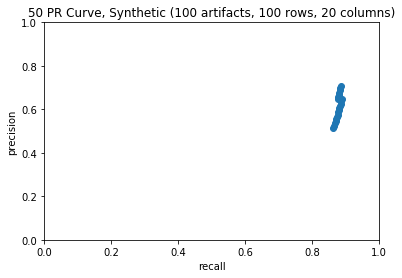

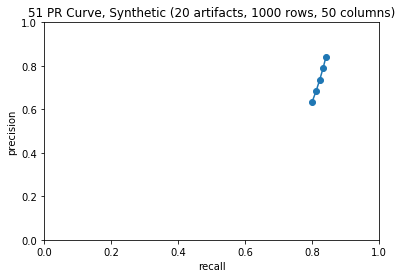

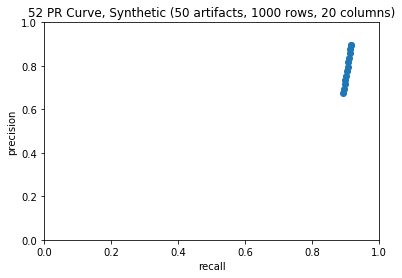

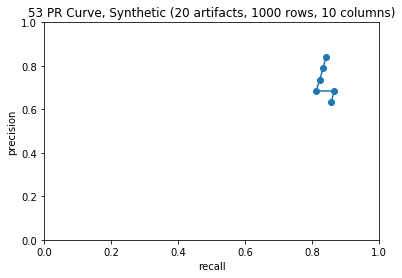

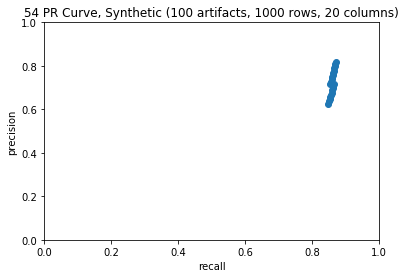

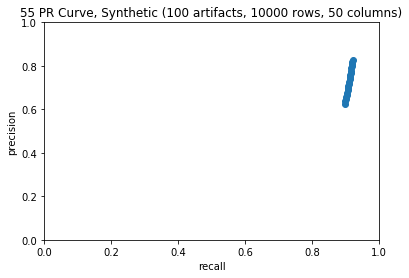

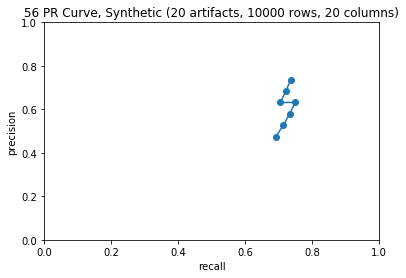

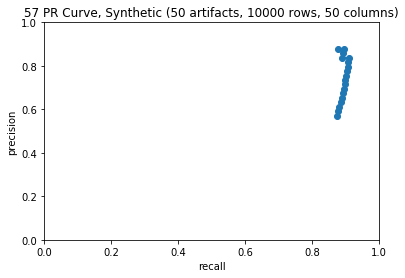

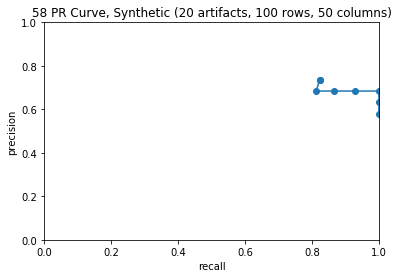

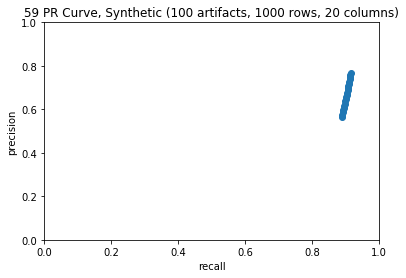

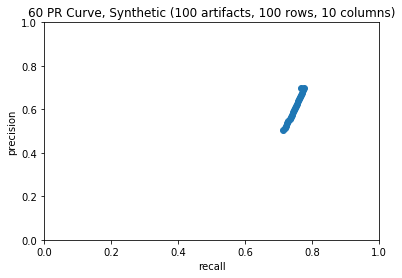

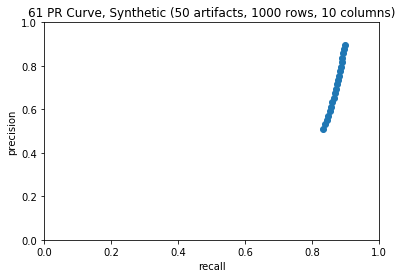

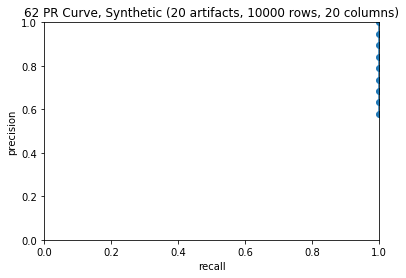

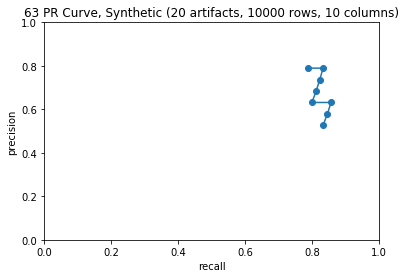

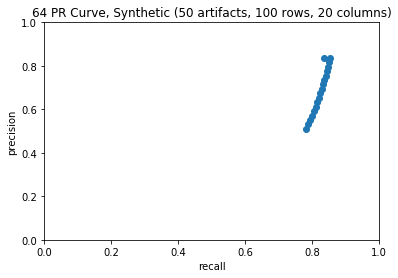

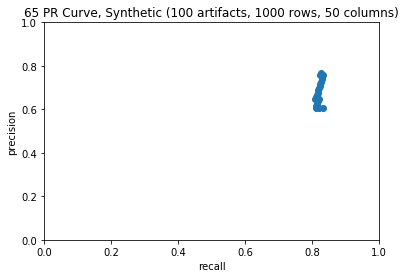

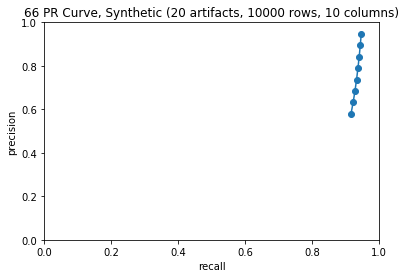

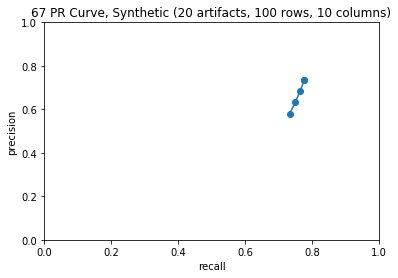

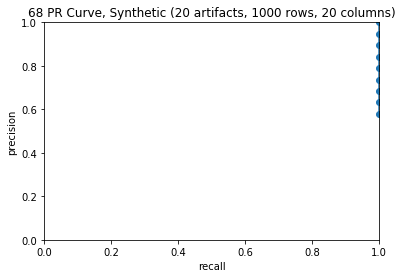

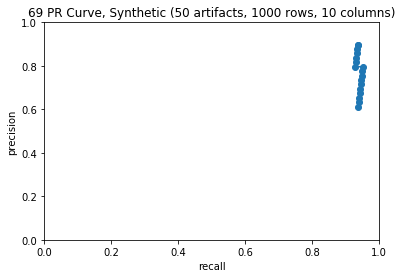

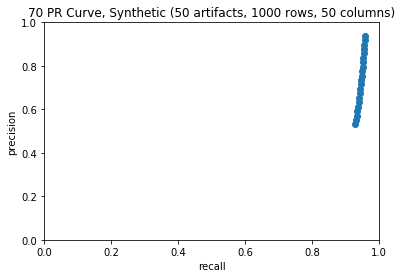

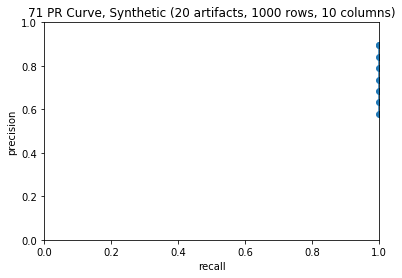

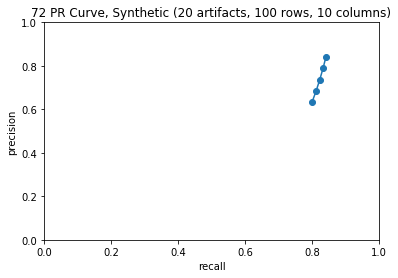

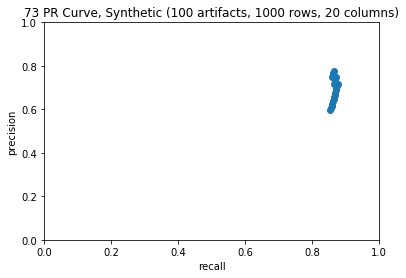

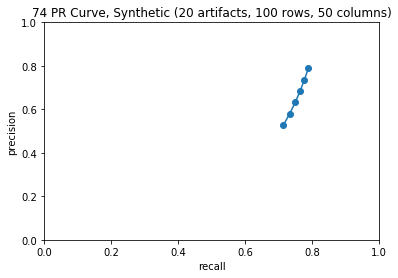

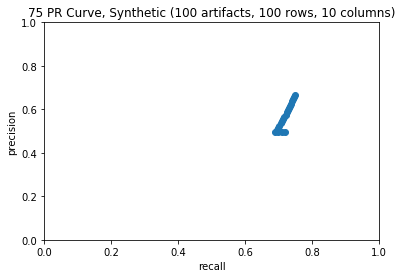

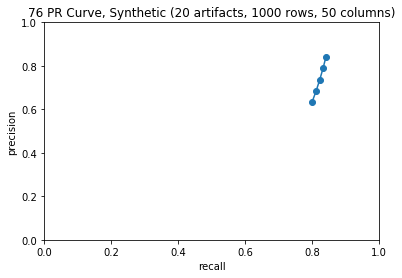

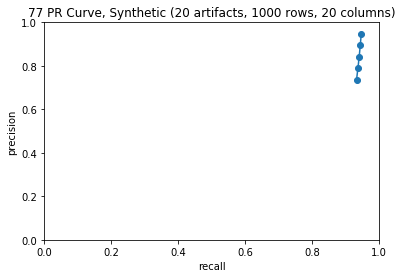

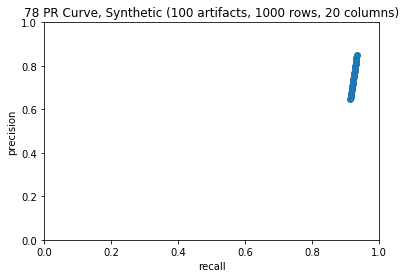

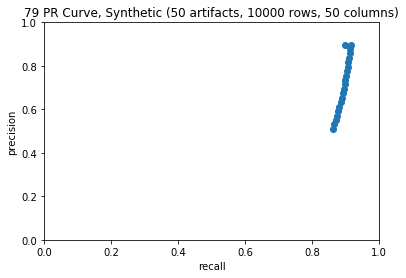

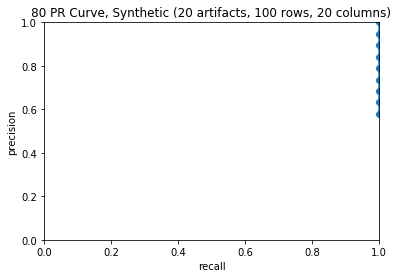

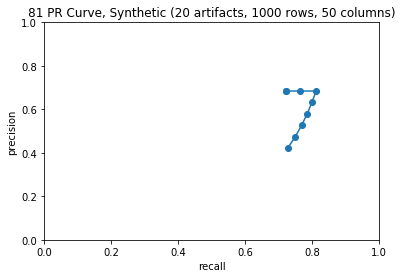

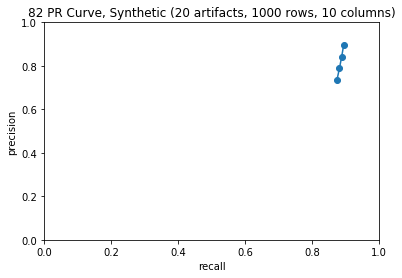

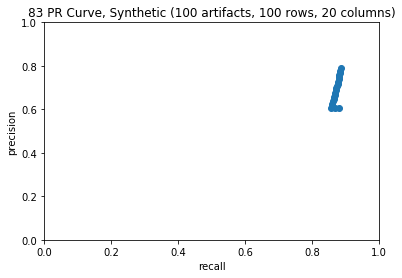

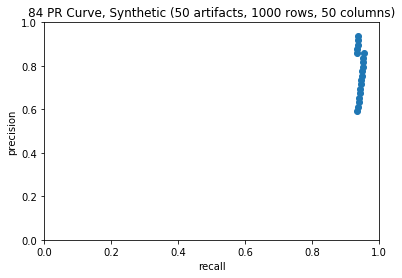

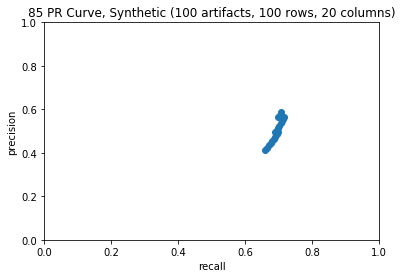

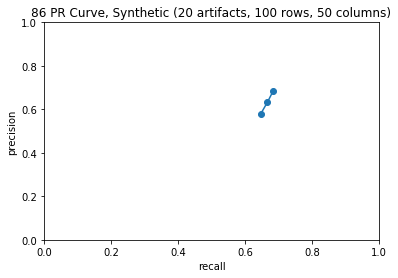

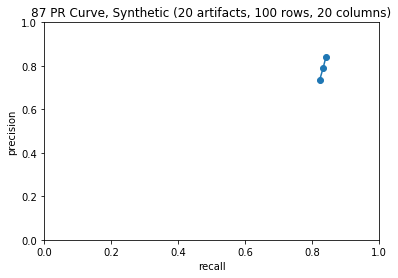

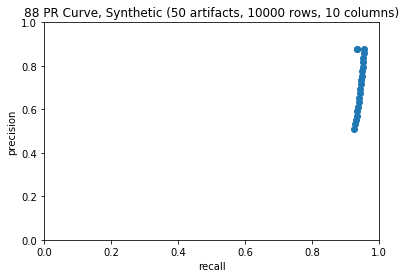

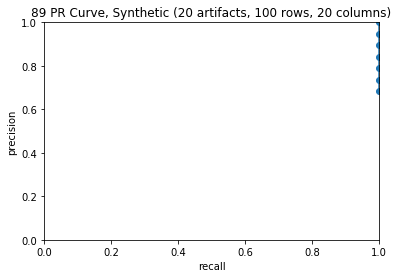

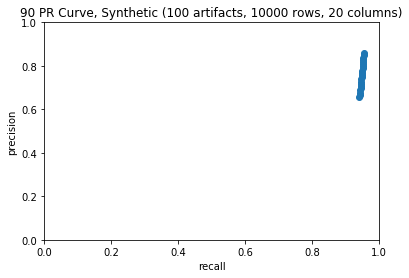

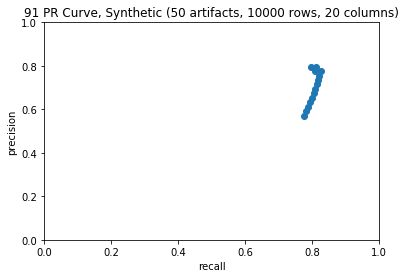

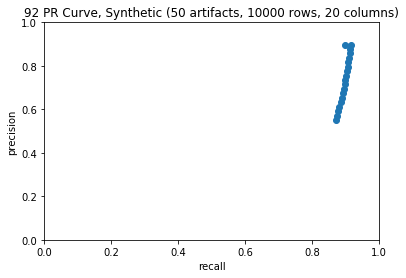

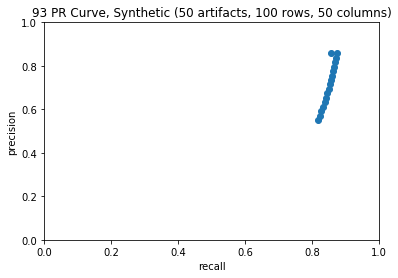

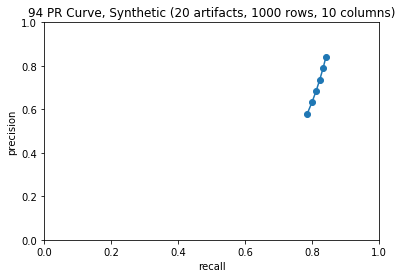

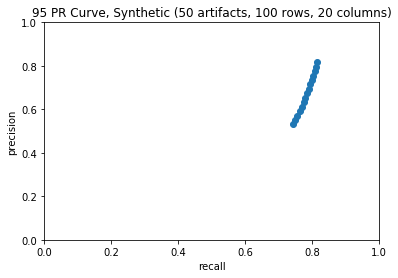

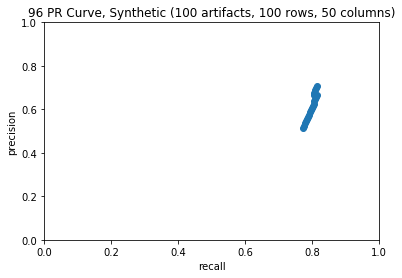

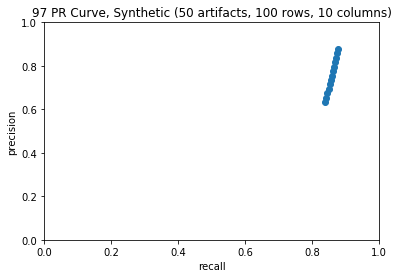

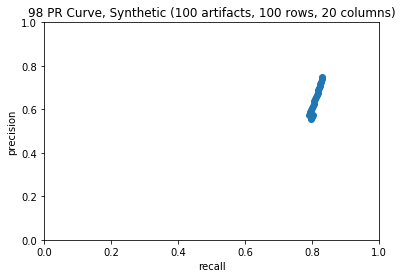

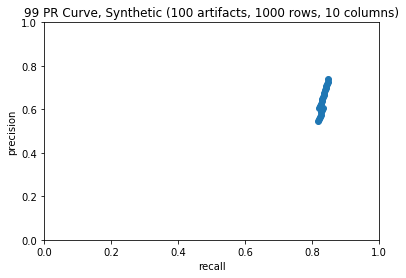

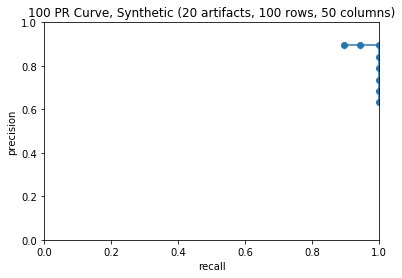

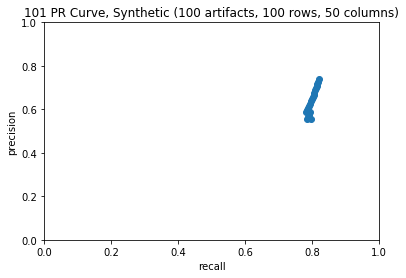

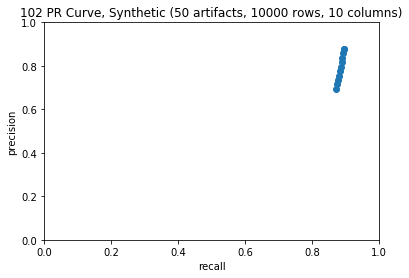

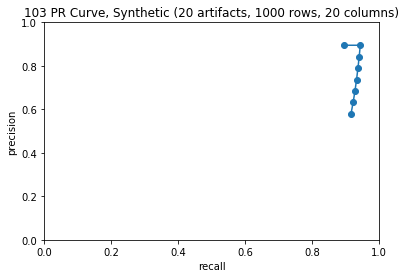

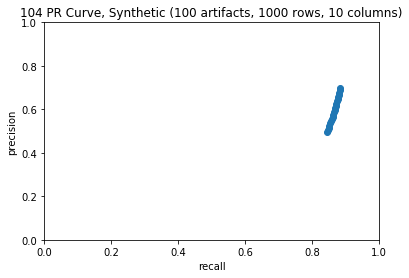

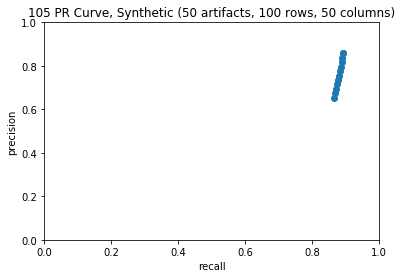

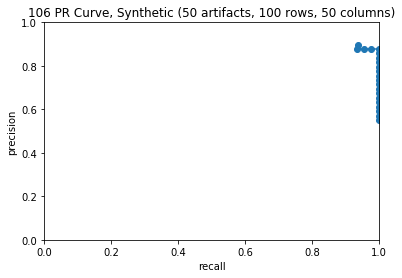

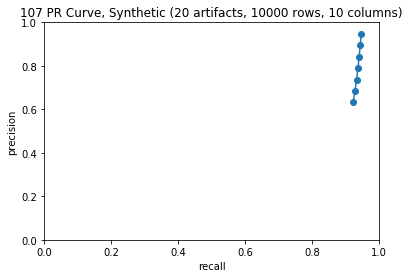

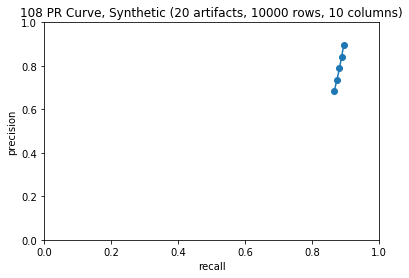

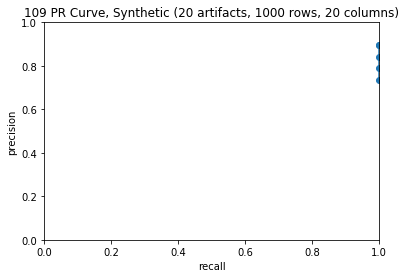

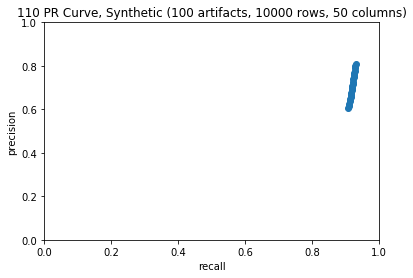

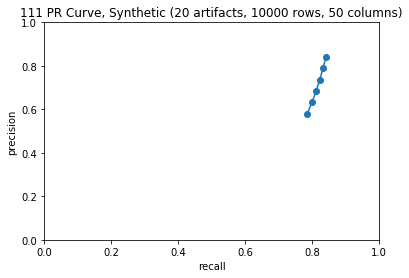

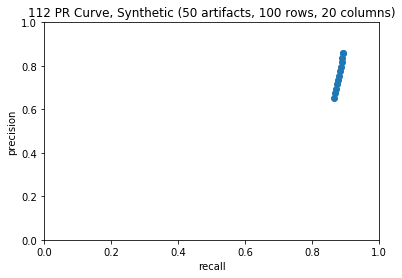

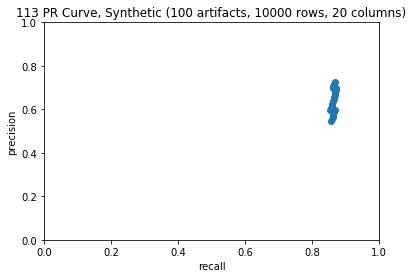

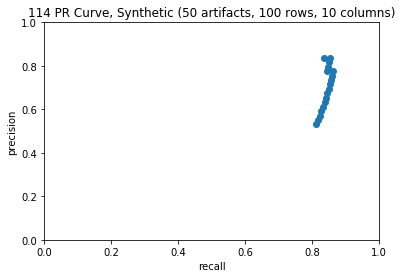

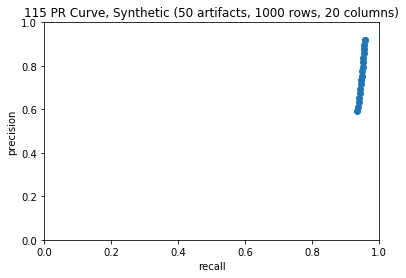

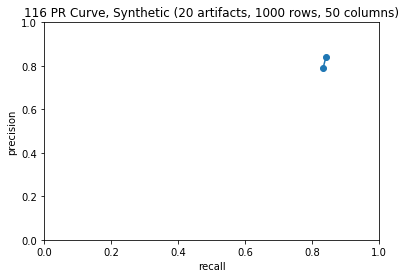

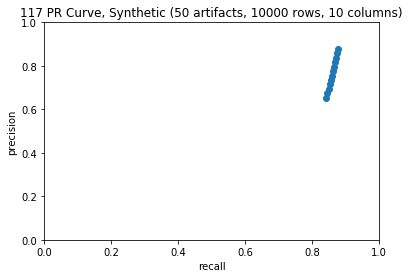

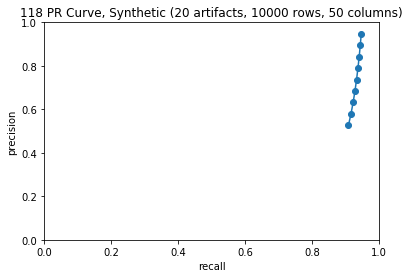

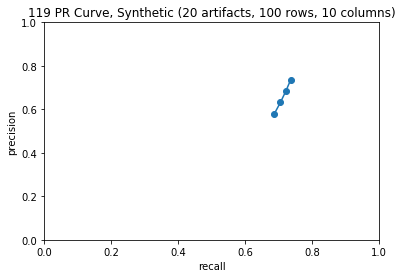

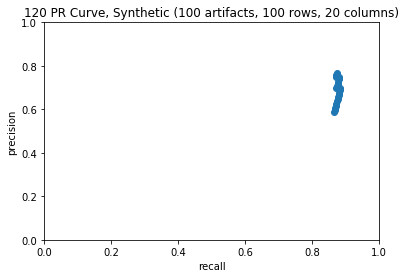

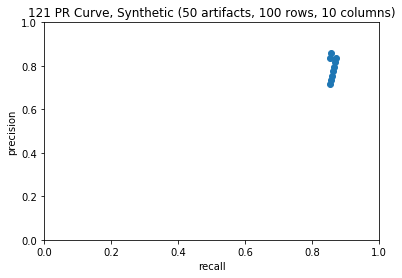

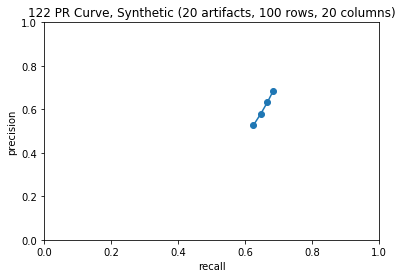

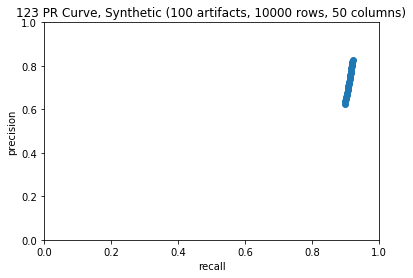

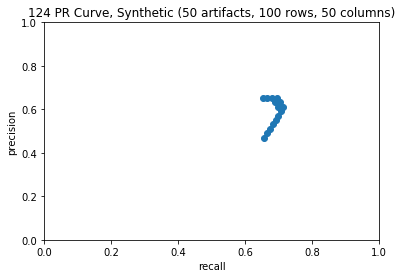

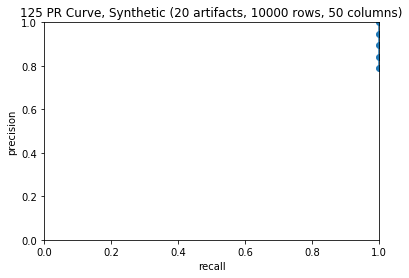

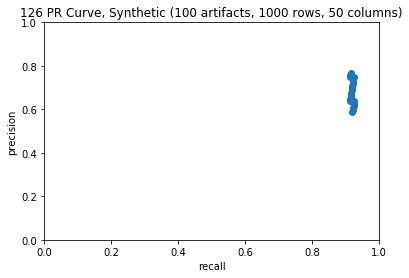

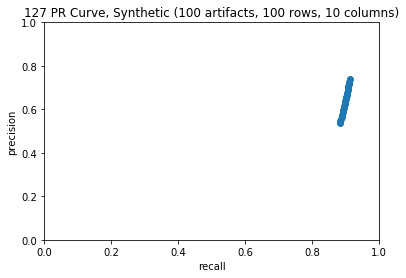

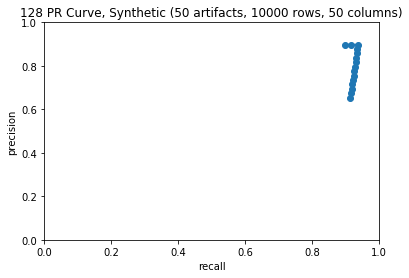

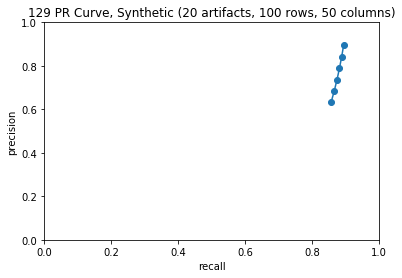

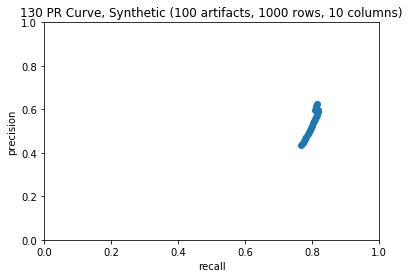

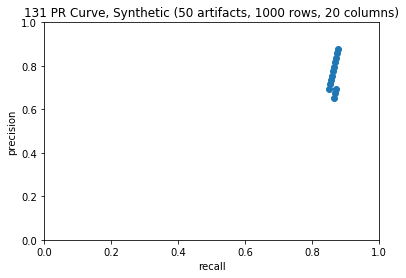

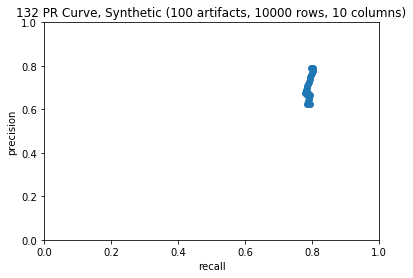

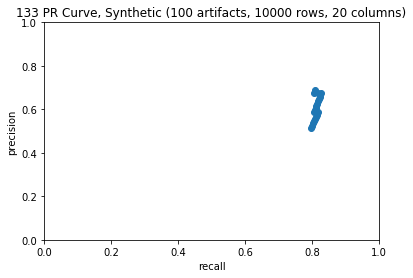

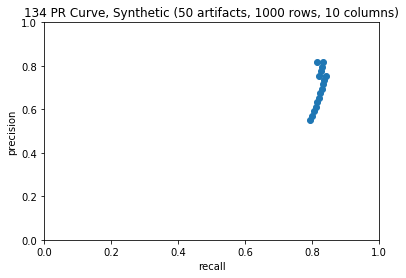

In [298]:
import matplotlib.pyplot as plt

rs = experiment2_pr_results()
for i,r in enumerate(rs):
    ax = r.plot.line('recall', 'precision', marker="o",legend=False)
    table = r.iloc[0]
    tbl_size = "("+str(table['artifacts'])+" artifacts, "+str(table['rows'])+" rows, "+str(table['columns'])+" columns)"
    plt.title(str(i)+ " PR Curve, Synthetic "+tbl_size)
    plt.ylim(0, 1.0)
    plt.xlim(0,1.0)
    ax.set_ylabel('precision')

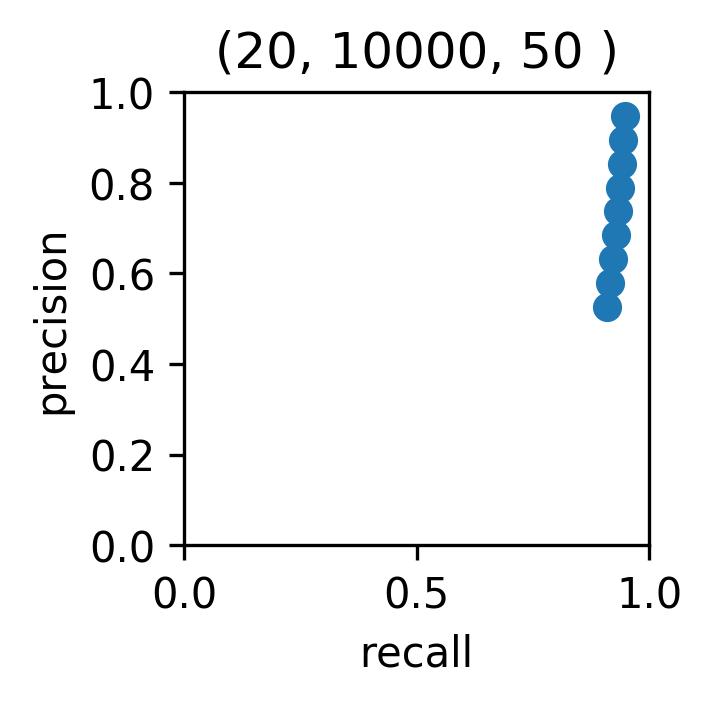

In [452]:
fig = plt.figure(num=None, figsize=(2,2), dpi=300, facecolor='w', edgecolor='k')
plt.tight_layout()
plot_pr(rs[118],plt.gca())
plt.savefig('mb3-a.pdf', bbox_inches='tight')

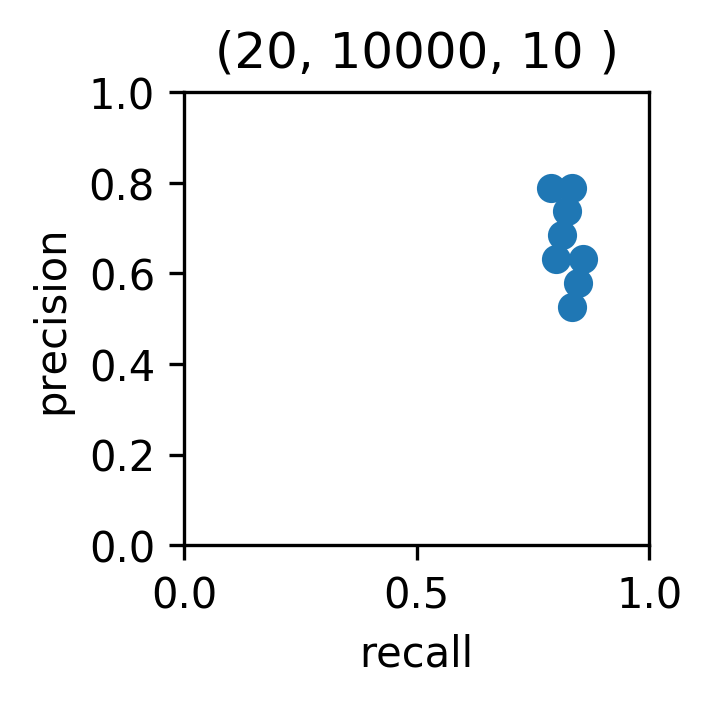

In [451]:
fig = plt.figure(num=None, figsize=(2,2), dpi=300, facecolor='w', edgecolor='k')
plt.tight_layout()
plot_pr(rs[63],plt.gca())
plt.savefig('mb3-b.pdf', bbox_inches='tight')

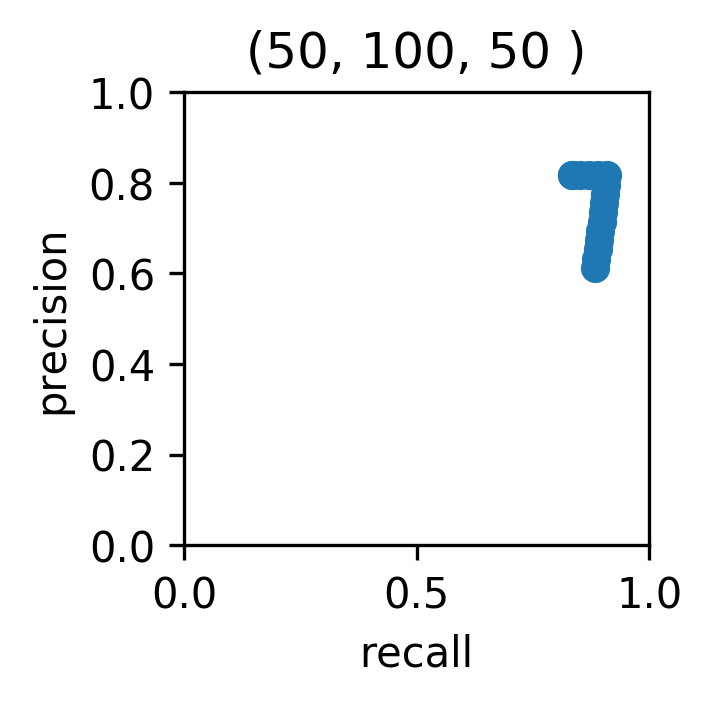

In [450]:
fig = plt.figure(num=None, figsize=(2,2), dpi=300, facecolor='w', edgecolor='k')
plt.tight_layout()
ax = plot_pr(rs[7],plt.gca())

plt.savefig('mb3-c.pdf', bbox_inches='tight')

/home/suhail/anaconda3/envs/relic/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


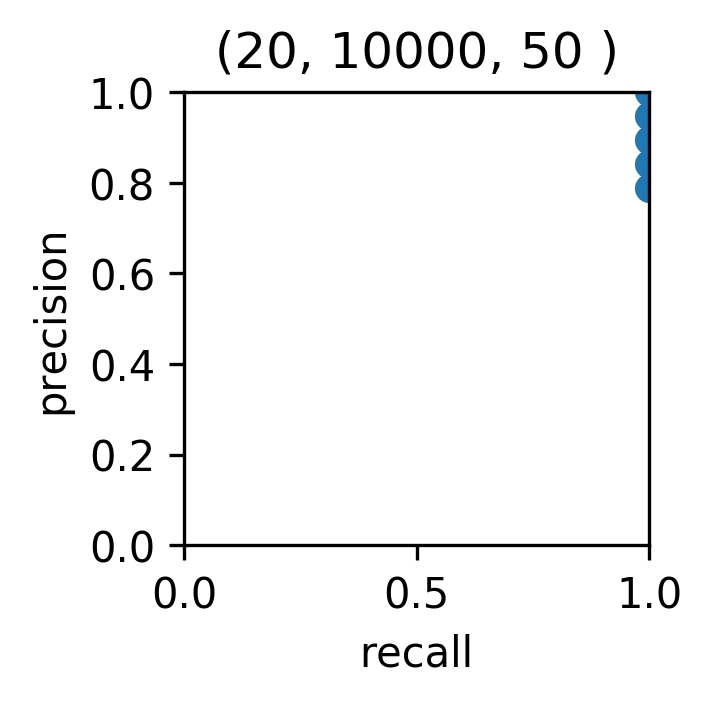

In [453]:
fig = plt.figure(num=None, figsize=(2,2), dpi=300, facecolor='w', edgecolor='k')
plt.tight_layout()
plot_pr(rs[125], plt.gca())
plt.savefig('mb3-d.pdf', bbox_inches='tight')

In [376]:
# Materialization frequency:

RESULT_DIR = '/home/suhail/Projects/relic/primitives/python/generator/results/matfreq_v100_5iters/'

notebooks = [d for d in os.listdir(RESULT_DIR) if os.path.isdir(os.path.join(RESULT_DIR, d))]

def experiment4_results():
    result = pd.DataFrame()
    for nb in notebooks:
        result = result.append(get_notebook_result(RESULT_DIR,nb).iloc[-1])
    return result

ex4_df = experiment4_results()


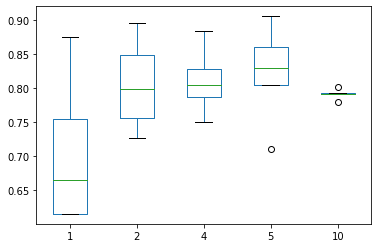

In [380]:
out = pd.concat({key: group['F1'].reset_index(drop=True)
                for key, group in ex4_df.groupby('artifacts')}, axis=1)
out = out.rename(columns={10:1,20:2,25:4,50:5,100:10})
out
out.plot.box()

<Figure size 2400x1200 with 0 Axes>

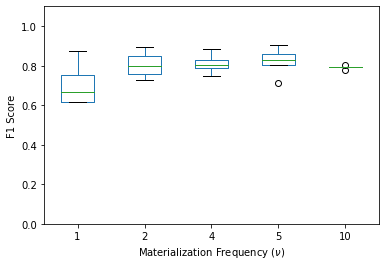

In [384]:
fig = plt.figure(num=None, figsize=(8, 4), dpi=300, facecolor='w', edgecolor='k')
ax = out.plot.box()
ax.set_ylabel('F1 Score')
ax.set_xlabel(r'Materialization Frequency ($\nu$)')
ax.set_ylim((0,1.1))
plt.savefig('mb4.pdf')

In [370]:
ex4_df = ex4_df.sort_values('nb_name').reset_index()[['artifacts', 'F1']].groupby('artifacts').agg(list)
ex4_df

,F1
artifacts,
10.0,"[0.6153846153846153, 0.8750000000000001, 0.714..."
20.0,"[0.7647058823529413, 0.7272727272727273, 0.833..."
25.0,"[0.8095238095238096, 0.75, 0.8837209302325582,..."
50.0,"[0.7111111111111109, 0.9052631578947368, 0.804..."
100.0,"[0.7932960893854748, 0.7916666666666666, 0.779..."


In [357]:
ex4_df['nu'] = pd.DataFrame([1,2,4,5,10], columns=['nu'], index=ex4_df.index)
ex4_df = ex4_df.set_index('nu')


In [358]:
r = ex4_df
ax = r.plot.box('F1',legend=False)
table = r.iloc[0]
tbl_size = "("+str(table['artifacts'])+" artifacts, "+str(table['rows'])+" rows, "+str(table['columns'])+" columns)"
plt.title("F1 Score, Synthetic "+tbl_size)
plt.ylim(0, 1.1)
ax.set_ylabel('F1 Score')
ax.set_xlabel(r'Materialization Frequency ($\nu$)')

TypeError: no numeric data to plot

In [51]:
r

,level_0,F1,Unnamed: 0,artifacts,columns,distance_metric,edges_correct,edges_missing,edges_to_remove,index,join_edges,missing_files,nb_name,numclusters,pre_cluster,precision,recall,rows,time,nu
0,20,0.882051,20.0,100.0,20.0,pandas_cell,86.0,13.0,10.0,0.0,NaN,0.0,20200202-190328,24.0,PC2,0.868687,0.895833,1000.0,83.580187,1
1,20,0.813187,20.0,50.0,20.0,pandas_cell,37.0,12.0,5.0,0.0,NaN,0.0,20200202-190330,28.0,PC2,0.755102,0.880952,1000.0,18.951476,2
2,19,0.750000,19.0,25.0,20.0,pandas_cell,18.0,6.0,6.0,0.0,NaN,0.0,20200202-190332,20.0,PC2,0.750000,0.750000,1000.0,5.439697,4
3,16,0.789474,16.0,20.0,20.0,pandas_cell,15.0,4.0,4.0,0.0,NaN,0.0,20200202-190334,17.0,PC2,0.789474,0.789474,1000.0,4.057988,5
4,9,1.000000,9.0,10.0,20.0,pandas_cell,9.0,0.0,0.0,0.0,NaN,0.0,20200202-190336,10.0,PC2,1.000000,1.000000,1000.0,1.024174,10


In [299]:
# Thresholding Experiment (3)


RESULT_DIR = '/home/suhail/Projects/relic/primitives/python/generator/results/pc2_thresholding_20artifacts/'

notebooks = [d for d in os.listdir(RESULT_DIR) if os.path.isdir(os.path.join(RESULT_DIR, d))]


def experiment3_results():
    result = pd.DataFrame()
    for nb in notebooks:
        result = result.append(get_notebook_result(RESULT_DIR,nb, 'relic_thresholding_final_result.csv'))
    return result

ex3_df = experiment3_results()
ex3_df

,Unnamed: 0,F1,Threshold,artifacts,columns,distance_metric,edges_correct,edges_missing,edges_to_remove,index,join_edges,missing_files,nb_name,numclusters,pre_cluster,precision,recall,rows,time
0,3,0.789474,0.00,20.0,10.0,pandas_cell,15.0,4.0,4.0,0.0,NaN,0.0,20200131-163550,4.0,PC2,0.789474,0.789474,100.0,1.752101
1,3,0.789474,0.05,20.0,10.0,pandas_cell,15.0,4.0,4.0,0.0,NaN,0.0,20200131-163550,4.0,PC2,0.789474,0.789474,100.0,1.766126
2,3,0.789474,0.10,20.0,10.0,pandas_cell,15.0,4.0,4.0,0.0,NaN,0.0,20200131-163550,4.0,PC2,0.789474,0.789474,100.0,1.871978
3,3,0.842105,0.15,20.0,10.0,pandas_cell,16.0,3.0,3.0,0.0,NaN,0.0,20200131-163550,4.0,PC2,0.842105,0.842105,100.0,1.961552
4,4,0.800000,0.20,20.0,10.0,pandas_cell,14.0,5.0,2.0,0.0,NaN,0.0,20200131-163550,4.0,PC2,0.736842,0.875000,100.0,1.830202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,6,0.705882,0.75,20.0,50.0,pandas_cell,12.0,7.0,3.0,0.0,NaN,0.0,20200131-163552,6.0,PC2,0.631579,0.800000,100.0,7.373028
16,6,0.705882,0.80,20.0,50.0,pandas_cell,12.0,7.0,3.0,0.0,NaN,0.0,20200131-163552,6.0,PC2,0.631579,0.800000,100.0,7.356990
17,6,0.580645,0.85,20.0,50.0,pandas_cell,9.0,10.0,3.0,0.0,NaN,0.0,20200131-163552,6.0,PC2,0.473684,0.750000,100.0,7.301137
18,6,0.482759,0.90,20.0,50.0,pandas_cell,7.0,12.0,3.0,0.0,NaN,0.0,20200131-163552,6.0,PC2,0.368421,0.700000,100.0,7.225776


In [300]:
ex3_df_mi = ex3_df.set_index(['artifacts','rows','columns']).sort_index()
pd.set_option('display.max_rows', ex3_df_mi.shape[0]+1)
ex3_df_mi

Unnamed: 0        F1  Threshold distance_metric  \
artifacts rows   columns                                                    
20.0      100.0  10.0              3  0.789474       0.00     pandas_cell   
                 10.0              3  0.789474       0.05     pandas_cell   
                 10.0              3  0.789474       0.10     pandas_cell   
                 10.0              3  0.842105       0.15     pandas_cell   
                 10.0              4  0.800000       0.20     pandas_cell   
                 10.0              4  0.800000       0.25     pandas_cell   
                 10.0              4  0.823529       0.30     pandas_cell   
                 10.0              4  0.823529       0.35     pandas_cell   
                 10.0              4  0.823529       0.40     pandas_cell   
                 10.0              4  0.823529       0.45     pandas_cell   
                 10.0              4  0.823529       0.50     pandas_cell   
                 10.0              4  0.787879       0.55     pandas_cell   
                 10.0              4  0.787879       0.60     pandas_cell   
                 10.0              4  0.750000       0.65     pandas_cell   
                 10.0              4  0.709677       0.70     pandas_cell   
                 10.0              4  0.709677       0.75     pandas_cell   
                 10.0              4  0.709677       0.80     pandas_cell   
                 10.0              4  0.709677       0.85     pandas_cell   
                 10.0              2  0.592593       0.90     pandas_cell   
                 10.0              1  0.416667       0.95     pandas_cell   
                 20.0              7  0.789474       0.00     pandas_cell   
                 20.0              7  0.789474       0.05     pandas_cell   
                 20.0              7  0.789474       0.10     pandas_cell   
                 20.0              8  0.756757       0.15     pandas_cell   
                 20.0              8  0.777778       0.20     pandas_cell   
                 20.0              8  0.777778       0.25     pandas_cell   
                 20.0              8  0.777778       0.30     pandas_cell   
                 20.0              8  0.800000       0.35     pandas_cell   
                 20.0              8  0.787879       0.40     pandas_cell   
                 20.0              8  0.787879       0.45     pandas_cell   
                 20.0              8  0.750000       0.50     pandas_cell   
                 20.0              8  0.709677       0.55     pandas_cell   
                 20.0              8  0.709677       0.60     pandas_cell   
                 20.0              8  0.709677       0.65     pandas_cell   
                 20.0              8  0.666667       0.70     pandas_cell   
                 20.0              8  0.666667       0.75     pandas_cell   
                 20.0              8  0.666667       0.80     pandas_cell   
                 20.0              8  0.666667       0.85     pandas_cell   
                 20.0              8  0.666667       0.90     pandas_cell   
                 20.0              1  0.347826       0.95     pandas_cell   
                 50.0              5  0.736842       0.00     pandas_cell   
                 50.0              5  0.736842       0.05     pandas_cell   
                 50.0              5  0.736842       0.10     pandas_cell   
                 50.0              5  0.736842       0.15     pandas_cell   
                 50.0              5  0.736842       0.20     pandas_cell   
                 50.0              5  0.736842       0.25     pandas_cell   
                 50.0              5  0.736842       0.30     pandas_cell   
                 50.0              5  0.736842       0.35     pandas_cell   
                 50.0              5  0.736842       0.40     pandas_cell   
                 50.0              5  0.736842       0.45     pandas_cell   
                 50.0 

In [301]:
ex3_df['Rows x Columns'] = ex3_df['rows'].astype(str)+'x'+ex3_df['columns'].astype(str)
ex3_df

,Unnamed: 0,F1,Threshold,artifacts,columns,distance_metric,edges_correct,edges_missing,edges_to_remove,index,join_edges,missing_files,nb_name,numclusters,pre_cluster,precision,recall,rows,time,Rows x Columns
0,3,0.789474,0.00,20.0,10.0,pandas_cell,15.0,4.0,4.0,0.0,NaN,0.0,20200131-163550,4.0,PC2,0.789474,0.789474,100.0,1.752101,100.0x10.0
1,3,0.789474,0.05,20.0,10.0,pandas_cell,15.0,4.0,4.0,0.0,NaN,0.0,20200131-163550,4.0,PC2,0.789474,0.789474,100.0,1.766126,100.0x10.0
2,3,0.789474,0.10,20.0,10.0,pandas_cell,15.0,4.0,4.0,0.0,NaN,0.0,20200131-163550,4.0,PC2,0.789474,0.789474,100.0,1.871978,100.0x10.0
3,3,0.842105,0.15,20.0,10.0,pandas_cell,16.0,3.0,3.0,0.0,NaN,0.0,20200131-163550,4.0,PC2,0.842105,0.842105,100.0,1.961552,100.0x10.0
4,4,0.800000,0.20,20.0,10.0,pandas_cell,14.0,5.0,2.0,0.0,NaN,0.0,20200131-163550,4.0,PC2,0.736842,0.875000,100.0,1.830202,100.0x10.0
5,4,0.800000,0.25,20.0,10.0,pandas_cell,14.0,5.0,2.0,0.0,NaN,0.0,20200131-163550,4.0,PC2,0.736842,0.875000,100.0,1.848380,100.0x10.0
6,4,0.823529,0.30,20.0,10.0,pandas_cell,14.0,5.0,1.0,0.0,NaN,0.0,20200131-163550,4.0,PC2,0.736842,0.933333,100.0,1.825407,100.0x10.0
7,4,0.823529,0.35,20.0,10.0,pandas_cell,14.0,5.0,1.0,0.0,NaN,0.0,20200131-163550,4.0,PC2,0.736842,0.933333,100.0,1.878709,100.0x10.0
8,4,0.823529,0.40,20.0,10.0,pandas_cell,14.0,5.0,1.0,0.0,NaN,0.0,20200131-163550,4.0,PC2,0.736842,0.933333,100.0,1.841528,100.0x10.0
9,4,0.823529,0.45,20.0,10.0,pandas_cell,14.0,5.0,1.0,0.0,NaN,0.0,20200131-163550,4.0,PC2,0.736842,0.933333,100.0,1.874040,100.0x10.0


In [302]:
pivoted = ex3_df[['Rows x Columns','Threshold','F1']].pivot(index='Threshold', columns='Rows x Columns')
pivoted

F1                                                \
Rows x Columns 100.0x10.0 100.0x20.0 100.0x50.0 1000.0x10.0 1000.0x20.0   
Threshold                                                                 
0.00             0.789474   0.789474   0.736842    0.736842    0.894737   
0.05             0.789474   0.789474   0.736842    0.736842    0.894737   
0.10             0.789474   0.789474   0.736842    0.756757    0.894737   
0.15             0.842105   0.756757   0.736842    0.685714    0.894737   
0.20             0.800000   0.777778   0.736842    0.685714    0.864865   
0.25             0.800000   0.777778   0.736842    0.685714    0.864865   
0.30             0.823529   0.777778   0.736842    0.685714    0.864865   
0.35             0.823529   0.800000   0.736842    0.705882    0.864865   
0.40             0.823529   0.787879   0.736842    0.705882    0.864865   
0.45             0.823529   0.787879   0.736842    0.705882    0.864865   
0.50             0.823529   0.750000   0.736842    0.666667    0.864865   
0.55             0.787879   0.709677   0.736842    0.666667    0.864865   
0.60             0.787879   0.709677   0.736842    0.687500    0.882353   
0.65             0.750000   0.709677   0.742857    0.666667    0.848485   
0.70             0.709677   0.666667   0.705882    0.666667    0.812500   
0.75             0.709677   0.666667   0.705882    0.620690    0.812500   
0.80             0.709677   0.666667   0.705882    0.620690    0.812500   
0.85             0.709677   0.666667   0.580645    0.571429    0.733333   
0.90             0.592593   0.666667   0.482759    0.400000    0.733333   
0.95             0.416667   0.347826   0.482759    0.347826    0.592593   

                            
Rows x Columns 1000.0x50.0  
Threshold                   
0.00              0.894737  
0.05              0.894737  
0.10              0.894737  
0.15              0.894737  
0.20              0.894737  
0.25              0.894737  
0.30              0.894737  
0.35              0.894737  
0.40              0.894737  
0.45              0.894737  
0.50              0.894737  
0.55              0.833333  
0.60              0.800000  
0.65              0.705882  
0.70              0.625000  
0.75              0.645161  
0.80              0.645161  
0.85              0.645161  
0.90              0.620690  
0.95              0.571429

<Figure size 3000x1200 with 0 Axes>

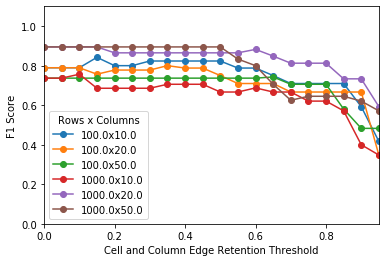

In [426]:
#pivoted.columns = pivoted.columns.droplevel()
fig = plt.figure(num=None, figsize=(10, 4), dpi=300, facecolor='w', edgecolor='k')
ax = pivoted['F1'].plot.line(marker='o', fig=fig)
ax.set_ylabel('F1 Score')
ax.set_xlabel('Cell and Column Edge Retention Threshold')
ax.set_ylim((0,1.1))
#plt.title('Sensitivity of Algorithm for 20 Artifacts')

plt.savefig('mb3.pdf')